
# **Proyecto final: Accidentes aereos desde su incios y satisfaccion de los pasajero en las aerolineas (clasificación binaria)**

# Dependencias.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datacleaner

  Preparing metadata (setup.py) ... done
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7408 sha256=d49bb9562a21f4bae4a848c8af115940495285a7236934463590719a7943493f
  Stored in directory: /root/.cache/pip/wheels/8f/bc/5b/f7ca5772f61851334a8580f3ede175b92a7122eef3464e2b3d
Successfully built datacleaner


In [ ]:
!pip install fasteda

  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=3c1c9d2d198aa572260477468bec8969f5e0626ba691e0fb89937e95f4c29026
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from seaborn import boxplot, distplot
from fasteda import fast_eda
from datacleaner import autoclean
import scipy
import scipy.stats as stats
from scipy import stats as sts
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, distplot
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive
from collections import Counter
import os
%matplotlib inline

## ACCIDENTES AEREOS DATA ACQUISITION

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Proyecto final/Accidentes_de_aviones_desde_1908.csv")
display(df)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


## Descripcion de la variable y dominio

Date - Fecha del accidente.

Time - Hora del accidente.

Location - Ubicación del accidente.

Operator - Aerolínea del avión.

Flight - Numero de vuelo.

Route - Ruta realizada en avión.

Type - tipo de avión.

Registration - Cadena alfanumérica única para identificar el avión.

cn/In - Número de construcción o de serie / Número de línea o de fuselaje.

Aboard - Número de personas a bordo.

Fatalities - Resultado letal.

Ground - Total de personas en tierra muertas debido al accidente.

Summary - Breve resumen del caso.

## Estadistica descriptiva

In [ ]:
df.shape

(5268, 13)

El dataFrame obtenido de la base de datos posee 5268 filas y 13 columnas, de las cuales 12 (DOCE) son variables independientes a analizar y 1 (una) corresponde a la variable target o dependiente (Fatalities). Lo cual me estare basando.

Informacion general

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


Tipos de datos y valores faltantes

In [ ]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Datos duplicados

In [ ]:
df.duplicated().value_counts()

False    5268
dtype: int64

El dataset no posee filas repetidas

##Columna Categorica

In [ ]:
df.describe(include = "object").T

,count,unique,top,freq
Date,5268,4753,09/11/2001,4
Time,3049,1005,15:00,32
Location,5248,4303,"Sao Paulo, Brazil",15
Operator,5250,2476,Aeroflot,179
Flight #,1069,724,-,67
Route,3562,3244,Training,81
Type,5241,2446,Douglas DC-3,334
Registration,4933,4905,49,3
cn/In,4040,3707,178,6
Summary,4878,4673,Crashed during takeoff.,15


## Columnas numéricas

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.0,27.554518,43.076711,0.0,5.0,13.0,30.0,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.0,9.0,23.0,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.0,0.0,0.0,2750.0


Es posible visualizar distintas variables numéricas como por ejemplo YEAR y MONTH que tiene valores absurdos e irreales. Mas tarde trabajare sobre esos datos de DataSet.

# EDA Y DATA WRANGLING

Analisis grafico de muertes anuales

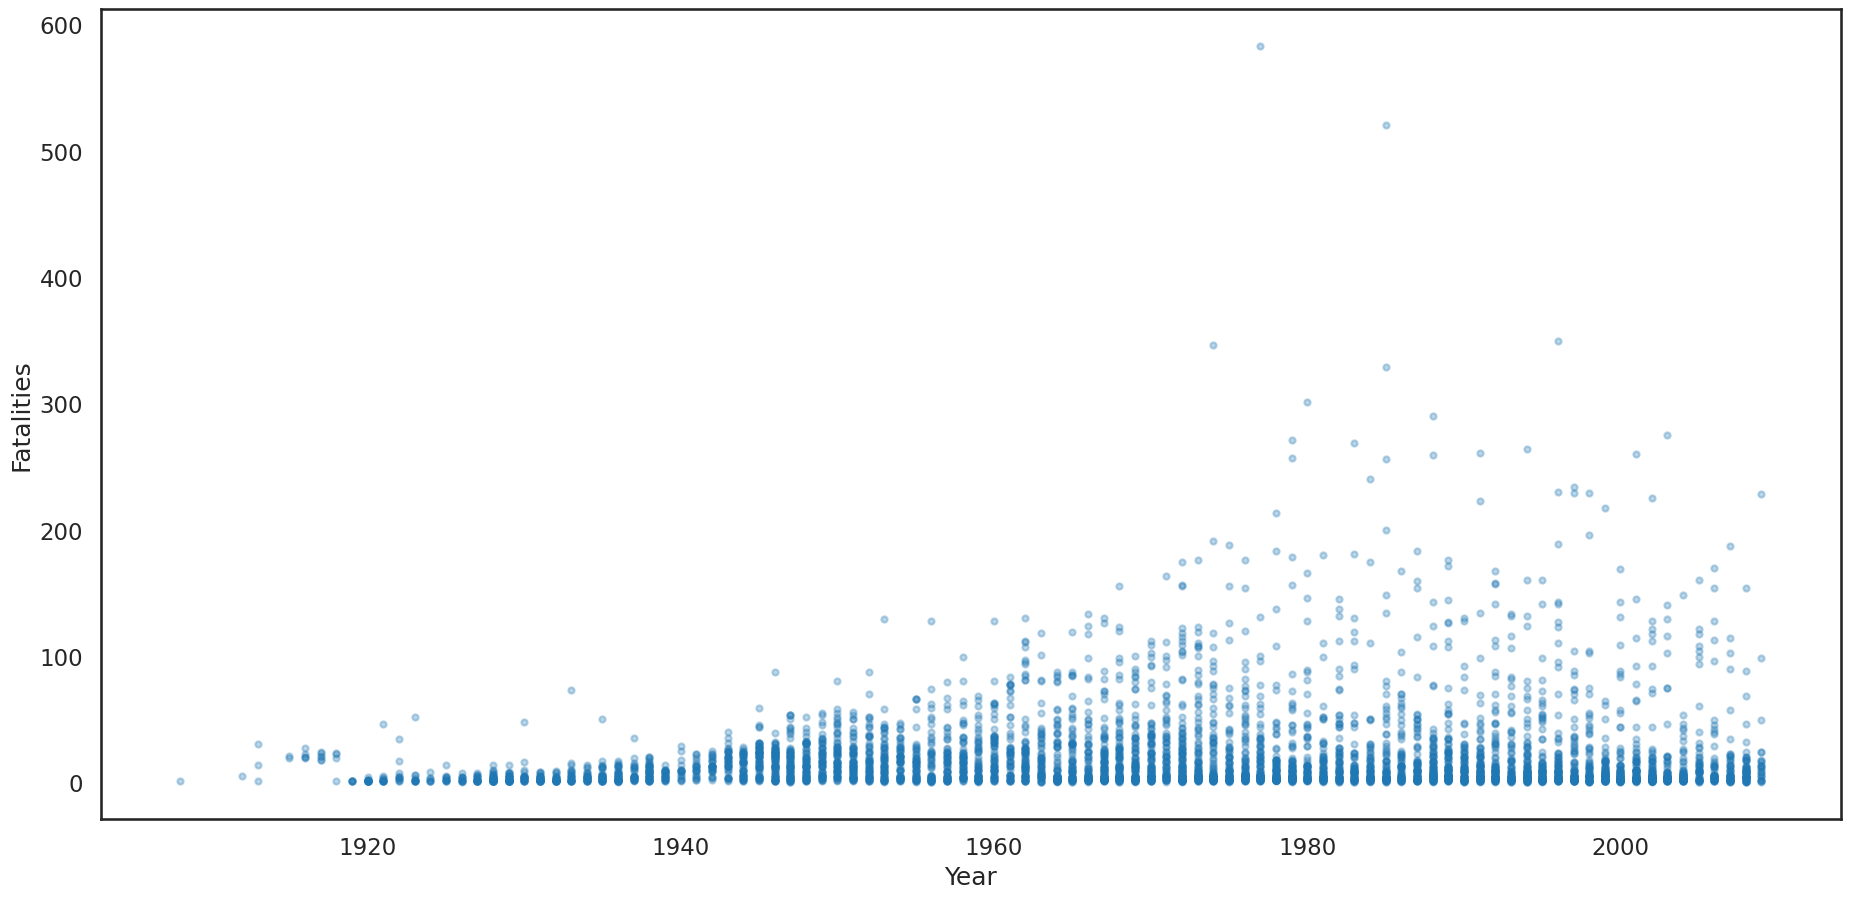

In [ ]:
df["Year"] = df["Date"].apply(lambda x: int(str(x)[-4:]))
df.plot.scatter("Year", "Fatalities", alpha=0.3);

Analizando el DataFrame vemos que hay muchas muertes por accidentes entre 1975 y 1980

Veamos esa grafica desde otro punto de vista para póder comprenderlo mejor

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df["year"] = df["Date"].dt.year

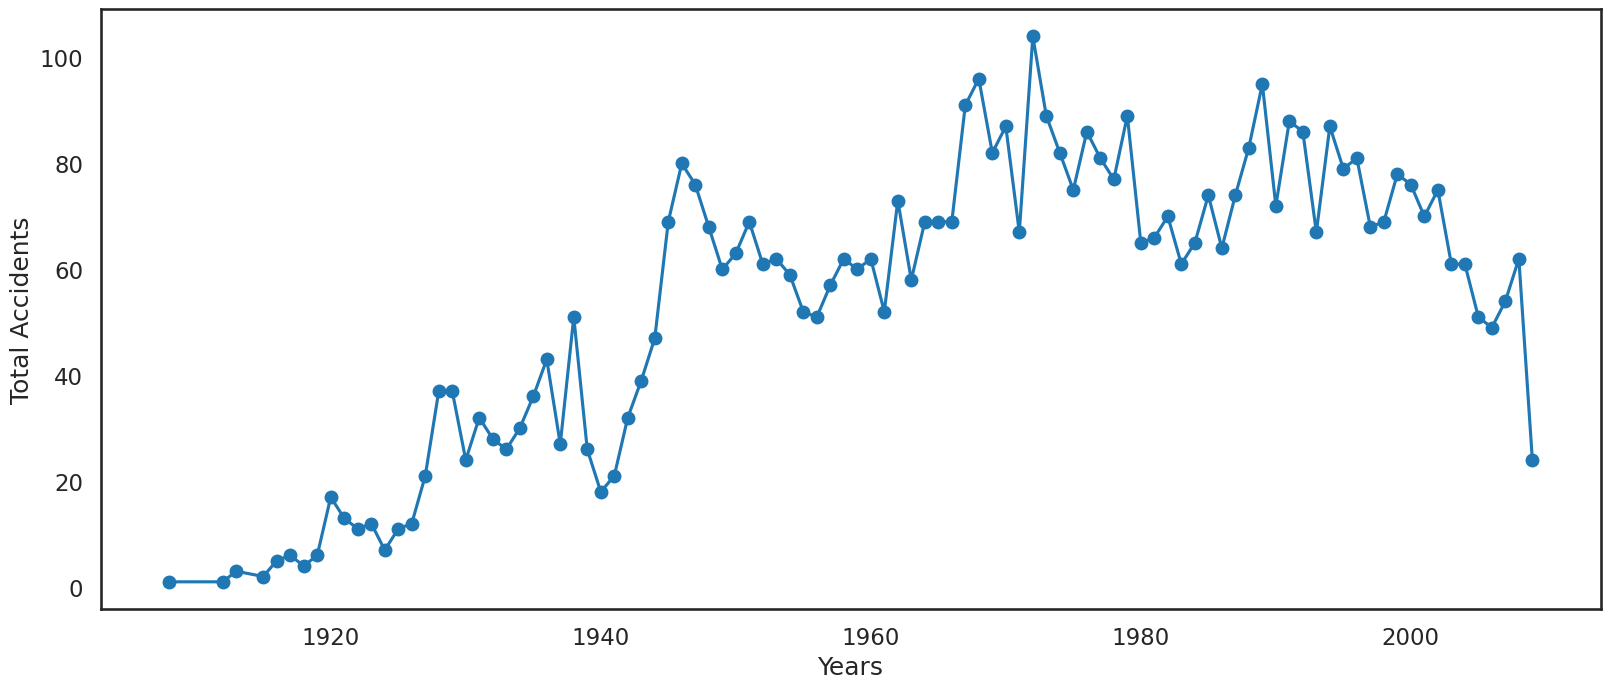

In [ ]:
year_count = df.groupby("year")["Date"].count()
fig = plt.figure(figsize = (15,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(year_count.index, year_count, marker="o")
plt.xlabel("Years")
plt.ylabel("Total Accidents");

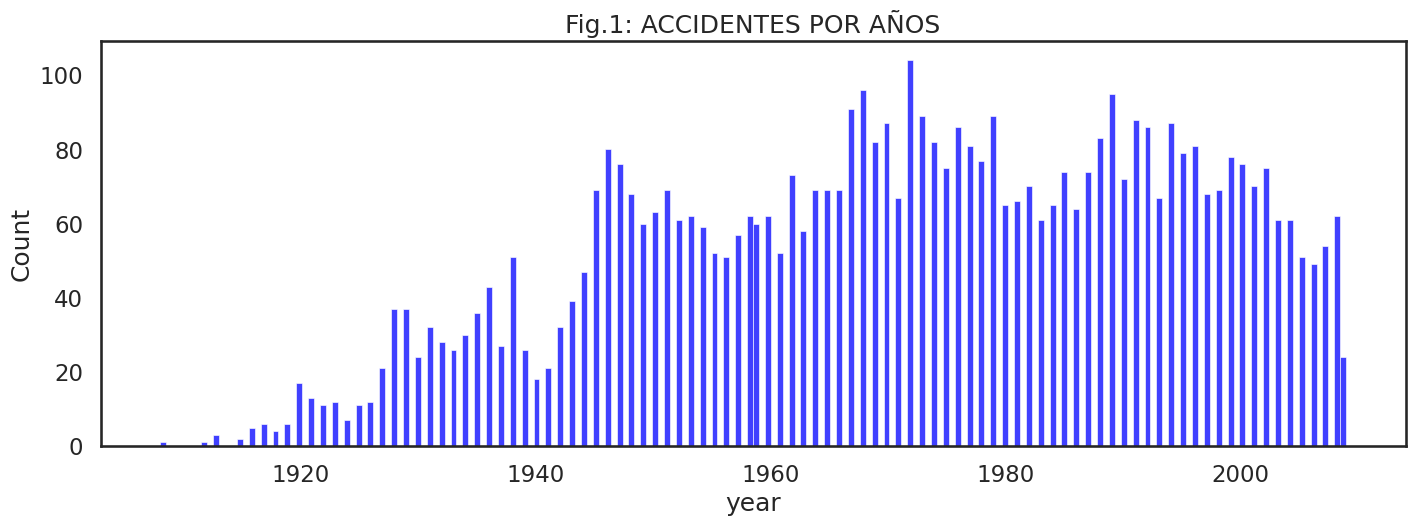

In [ ]:
plt.figure(figsize = (15,5))
per_year_plot = sns.histplot(data = df, x = "year", bins = 200, color = "blue")
per_year_plot.set(title = "Fig.1: ACCIDENTES POR AÑOS")
fig = per_year_plot.get_figure()

(Respuesta A)  Podemos observar claramente el pico más alto fue durante la década de los 70.

**ANALISIS ACCIDENTE POR MODELO DE AVION**


Ahora visualizaremos de estos accidentes la cantida de muerte por modelo de avion, para eso vamos a realizar un datset agrupandolos.

In [ ]:
def top_10(Column, dataframe):
    df_new = dataframe.groupby([Column])["Fatalities"].sum()
    df_new = df_new.rename(columns={"Type" "Fatalities"})
    return df_new

In [ ]:
df_fatal = df.groupby("Type")[["Fatalities"]].sum()
df_fatal

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0
ATR 42-300,2.0
ATR-42-300,46.0
...,...
de Havilland Dove 1,22.0
de Havilland Dragon 1,3.0
de Havilland RU-6A Beaver /Bell UH-1H,18.0


Porcentaje de fatalidades por modelo de avión

In [ ]:
df_type_fatal = df_fatal.sort_values(by="Fatalities", ascending=False)
df_type_fatal_top10 = df_fatal.head(20)
df_type_fatal_top10

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0
ATR 42-300,2.0
ATR-42-300,46.0
ATR-72-202,16.0
ATR-72-212,68.0
Aermacchi MB-339PAN (3 aircraft),3.0
Aero Commander 520,6.0


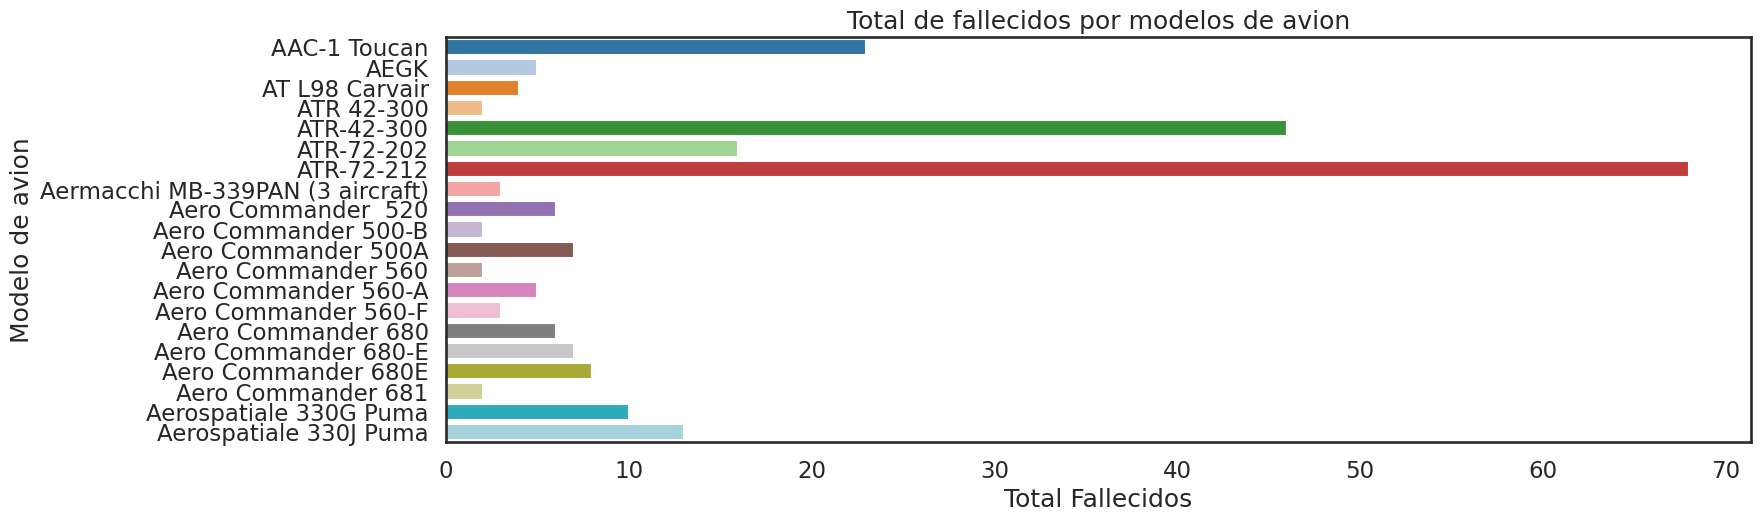

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(y =df_type_fatal_top10.index, x="Fatalities", data=df_type_fatal_top10)
plt.xlabel("Total Fallecidos")
plt.ylabel("Modelo de avion")
plt.title("Total de fallecidos por modelos de avion");

(Respuesta B) Ahora podemos observar los aviones con más accidentes y causando el mayor porcentaje de víctimas es el ATR-72-212

## Filtrado de outliers

Aboard            Axes(0.08,0.740345;0.18913x0.139655)
Fatalities    Axes(0.306957,0.740345;0.18913x0.139655)
Ground        Axes(0.533913,0.740345;0.18913x0.139655)
Year           Axes(0.76087,0.740345;0.18913x0.139655)
year              Axes(0.08,0.572759;0.18913x0.139655)
dtype: object

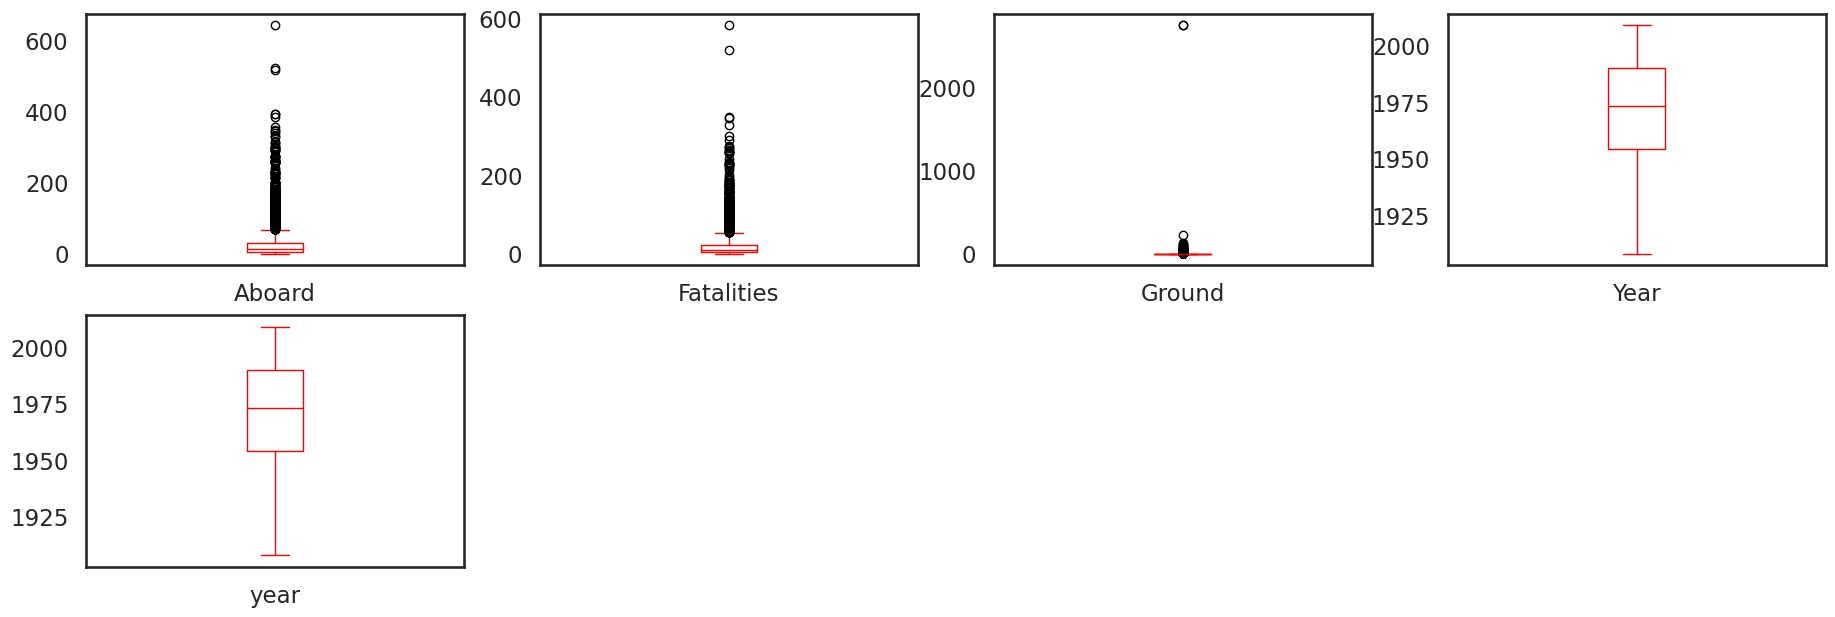

In [ ]:
df.plot(subplots =True, kind = "box", layout = (5,4), figsize = (20,18), color = "red")

Analizando los Outliers nos da esta estadística

Aboard      Axes 0.08,0.740345      
Fatalities   Axes 0.306957,0.740345

podemos observar en el diagrama de caja que ambos Aboard & Fatalities   están muy por debajo de la media y tiene muchos valores atípicos superior leves, el quartil superior está por debajo de la media y el quartil inferior la mínima esta en 1 y el extremo inferior en 0.

Ground      Axes 0.533913,0.740345  

El diagrama de caja Ground indica que tiene valores muy por debajo de la media, y sus valores son atípicos, aunque muy bajo.

Year           Axes 0.76087,0.740345
year           Axes 0.08,0.572759

El diagrama de caja de Year no se pueden observar valores atípicos, pero si podremos ver claramente que los valores están encima de la media. Los quartil superior están muy por encima, del mismo modo que la mediana que tiene el extremo superior más volumen que el extremo inferior


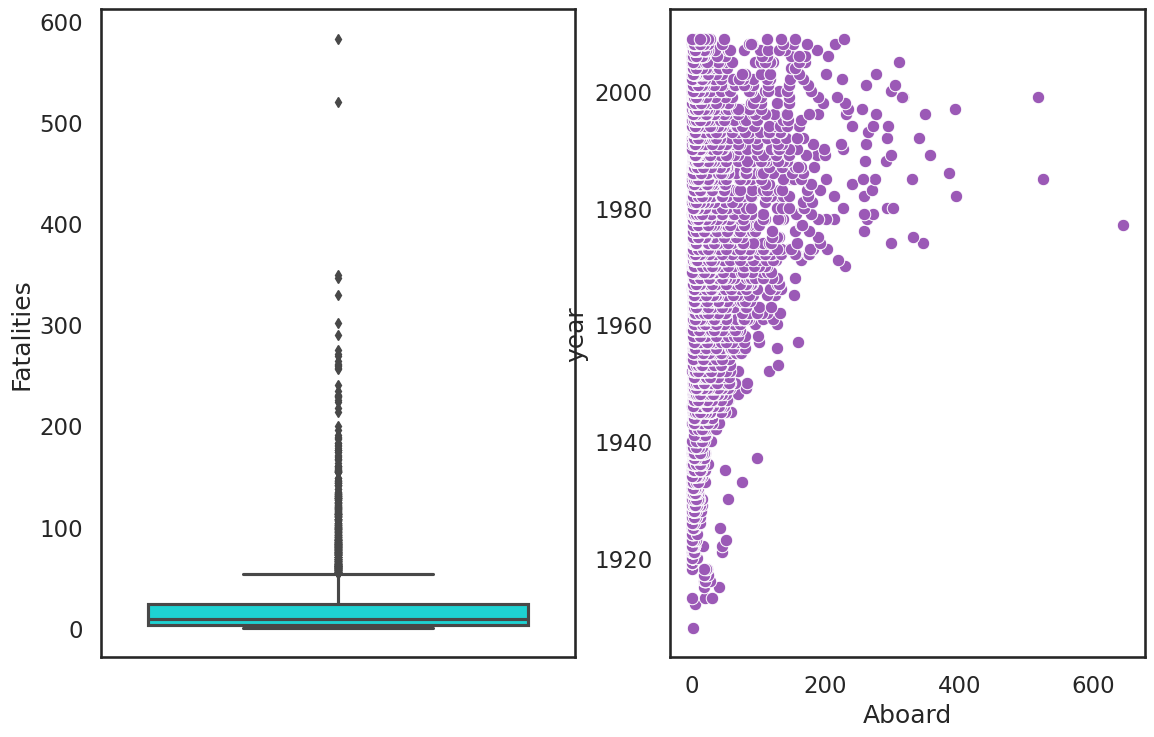

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y="Fatalities",color="#00f0f0")
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x="Aboard",y="year",color="#9b59b6")
plt.show()

Pódemos ver una suba muy alta de accidentes entre  1970 y 1980

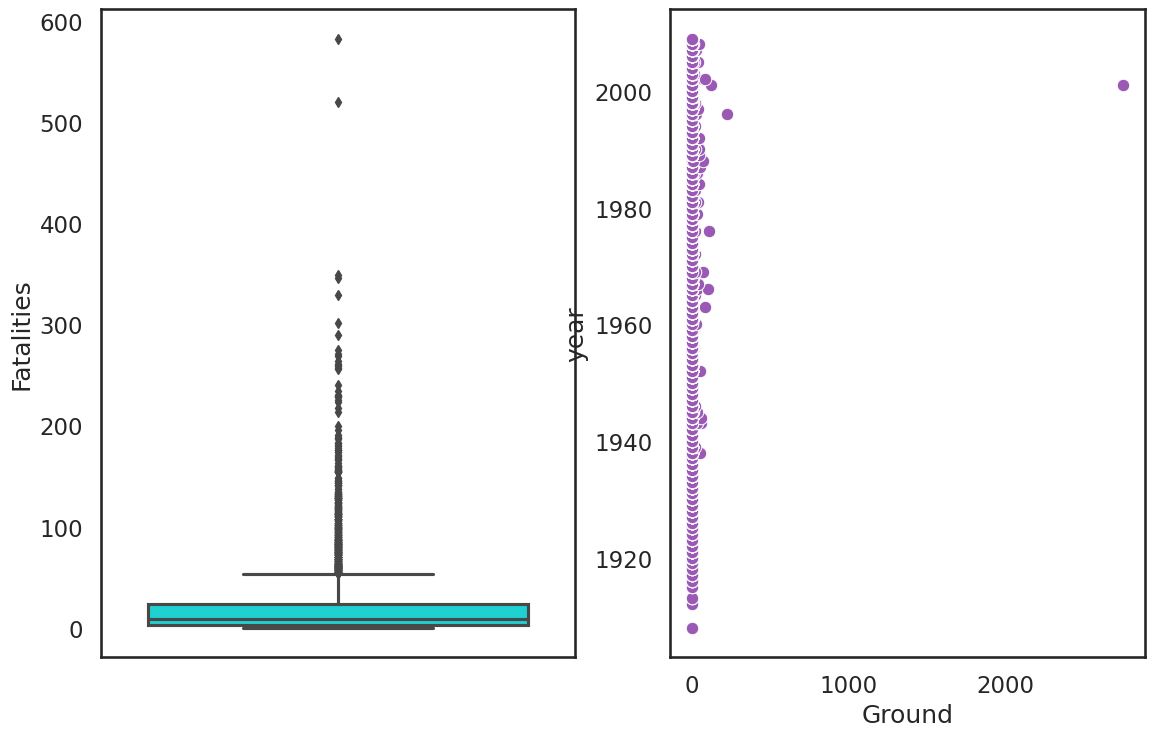

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y="Fatalities",color="#00f0f0")
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x="Ground",y="year",color="#9b59b6")
plt.show()

Los accidentes en tierra se mantienen casi iguales, por excepto en principios del 2000, veamos el motivo.

Para poder entender bien los Outliers, necesitamos entender bien las correlaciones y para eso analizaremos los puntos más importantes. Aboar, Ground y Fatalities

Entonces vamos a cargar de nuevo el Dataframe y realizar un análisis limpio.



In [ ]:
na_numeric = ['Aboard', 'Fatalities', 'Ground']

for col in na_numeric:
    df[col].fillna(0, inplace = True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime("%m/%d/%Y")
df['Date'].head(5)

0    09/17/1908
1    07/12/1912
2    08/06/1913
3    09/09/1913
4    10/17/1913
Name: Date, dtype: object

Para fines de visualización, creemos una nueva columna con solo el año de la columna 'Fecha'.


In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Year'].head(5)

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

Con datos sobre el número de víctimas mortales, las personas muertas en tierra y las personas a bordo, podemos crear una nueva columna con el número de personas que sobrevivieron al accidente. Llamaremos a esta columna "Survived".

In [ ]:
df['Survived'] = df['Aboard'] - (df['Fatalities'] + df['Ground'])
df.Survived = np.where(df.Survived < 0, 0, df.Survived)
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0


In [ ]:
df.describe()

,Aboard,Fatalities,Ground,Year,year,Survived
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000
mean,27.439446,20.022589,1.602126,1971.300304,1971.300304,7.377183
std,43.023370,33.175910,53.875057,22.387541,22.387541,28.028707
min,0.000000,0.000000,0.000000,1908.000000,1908.000000,0.000000
25%,5.000000,3.000000,0.000000,1954.000000,1954.000000,0.000000
50%,13.000000,9.000000,0.000000,1973.000000,1973.000000,0.000000
75%,30.000000,23.000000,0.000000,1990.000000,1990.000000,2.000000
max,644.000000,583.000000,2750.000000,2009.000000,2009.000000,516.000000


**Accidente con la mayoría de las personas a bordo.**

In [ ]:
df.loc[df['Aboard'] == 644]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
2963,03/27/1977,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...,1977,61.0


**Accidente con mayor supervivencia**

In [ ]:
df.loc[df['Survived'] == 516]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
4645,07/23/1999,11:25,"Tokyo, Japan",All Nippon Airways,61,"Tokyo, Japan - Chitose, Japan",Boeing B-747,NaN,NaN,517.0,1.0,0.0,Two minutes after taking off from Haneda Airpo...,1999,516.0


**Accidente con más víctimas mortales**

In [ ]:
df.loc[df['Fatalities'] == 583]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,year,Survived
2963,03/27/1977,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...,1977,1977,61.0


**Accidente con la mayoría de las personas muertas en tierra** La fecha nos dice que fue durante el atentado a las torres gemelas.

In [ ]:
df.loc[df['Ground'] == 2750]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,year,Survived
4803,09/11/2001,08:47,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,2001,0.0
4804,09/11/2001,09:03,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,2001,0.0


**Visualizacion.**



In [ ]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_palette('tab20')

Accidentes de avión por año:

Primero resumimos para obtener el recuento de accidentes por año

In [ ]:
total_crashes_year = df[['Year', 'Date']].groupby('Year').count()
total_crashes_year = total_crashes_year.reset_index()
total_crashes_year.columns = ['Year', 'Crashes']

Tramo la lineal con Seaborn


Text(0, 0.5, 'number of crashes')

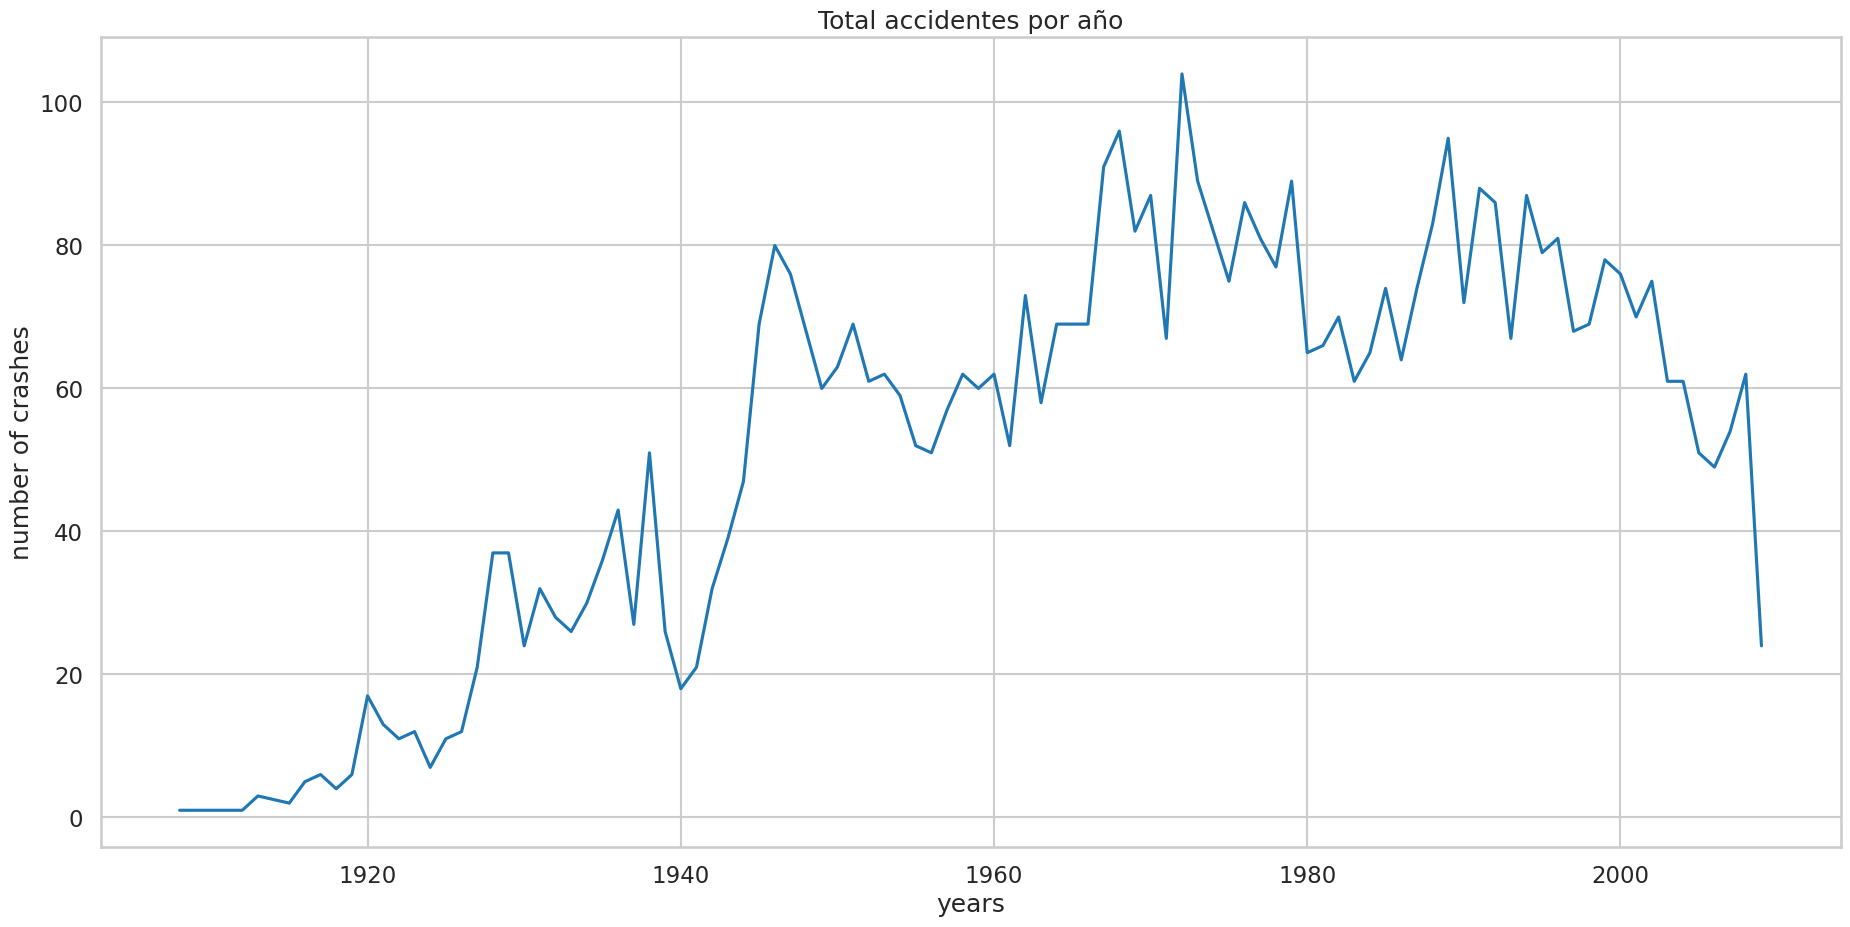

In [ ]:
sns.lineplot(x = 'Year', y = 'Crashes', data = total_crashes_year)
plt.title('Total accidentes por año')
plt.xlabel('years')
plt.ylabel('number of crashes')

**Accidentes de avión por año**

In [ ]:
pcdeaths_year = df[['Year', 'Fatalities']].groupby('Year').sum()
pcdeaths_year.reset_index(inplace = True)

Text(0.5, 0, 'Years')

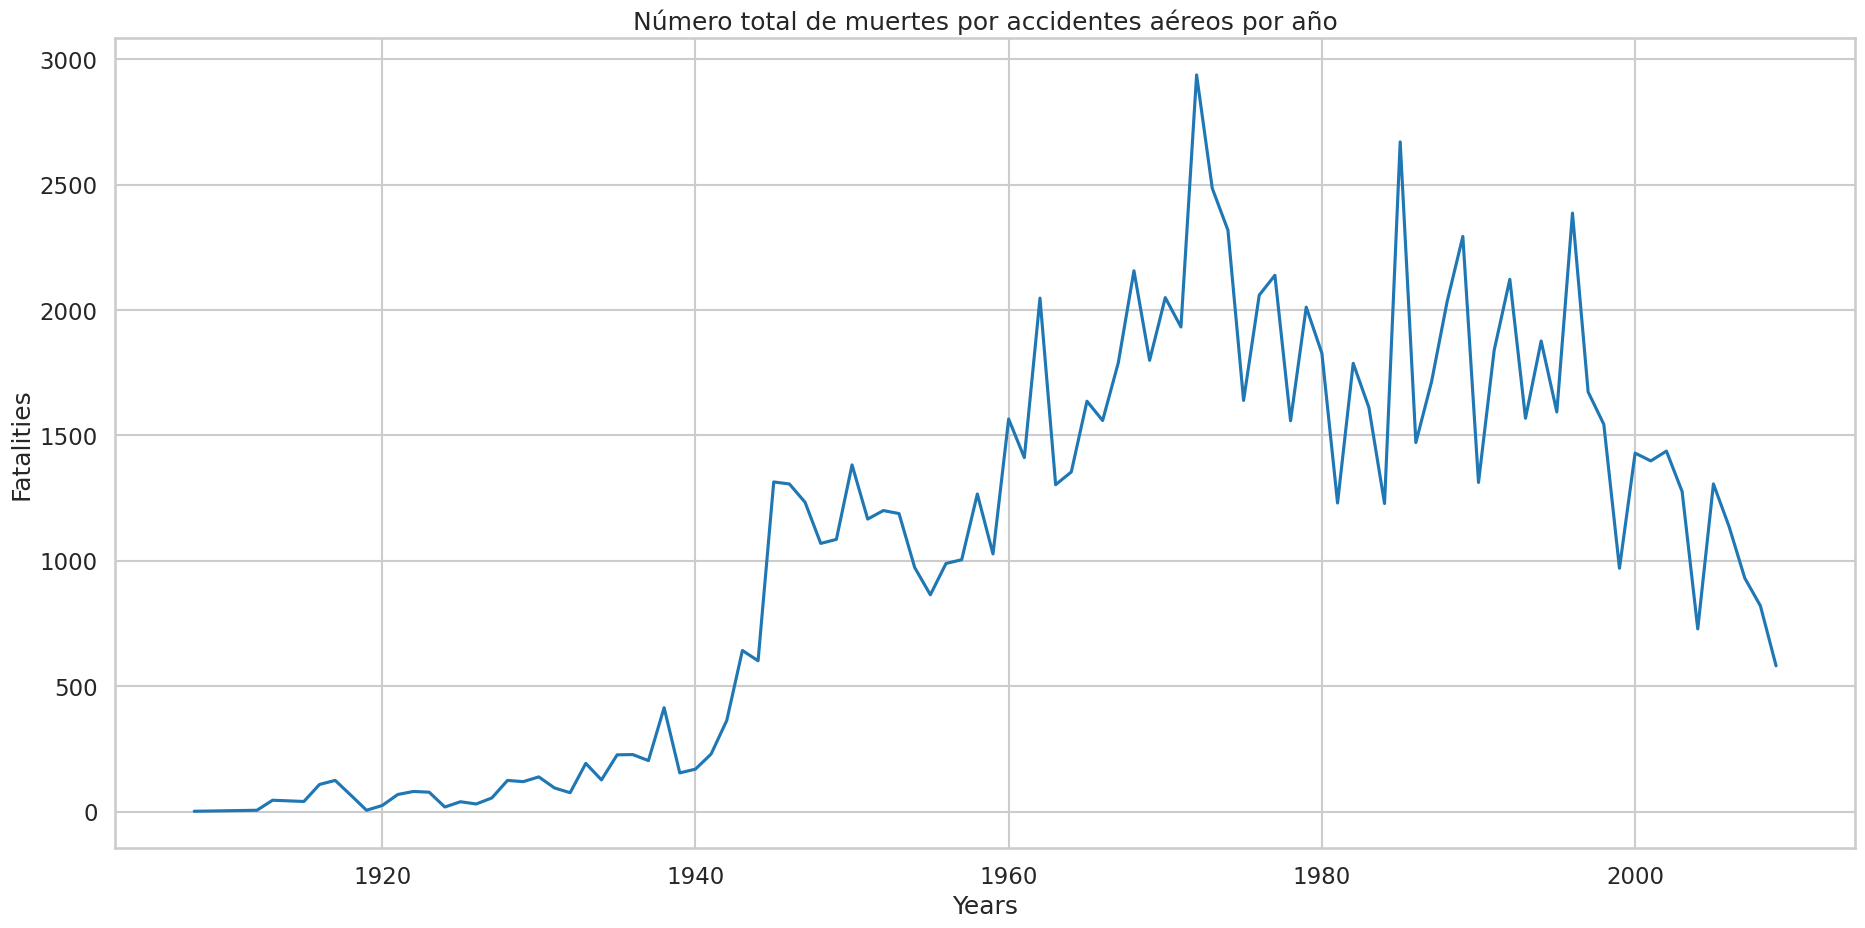

In [ ]:
sns.lineplot(x = 'Year', y = 'Fatalities', data = pcdeaths_year)
plt.title('Número total de muertes por accidentes aéreos por año')
plt.xlabel('Fatalities')
plt.xlabel('Years')

Aquí podemos ver el mismo patrón, los años que tuvieron más accidentes también son los que tienen más víctimas mortales

**Comparacion anual de pasajeros y no pasajeros fuera y adentro del avión**

In [ ]:
abrd_per_year = df[['Year', 'Aboard']].groupby('Year').sum()
abrd_per_year = abrd_per_year.reset_index()

Text(0, 0.5, 'Count')

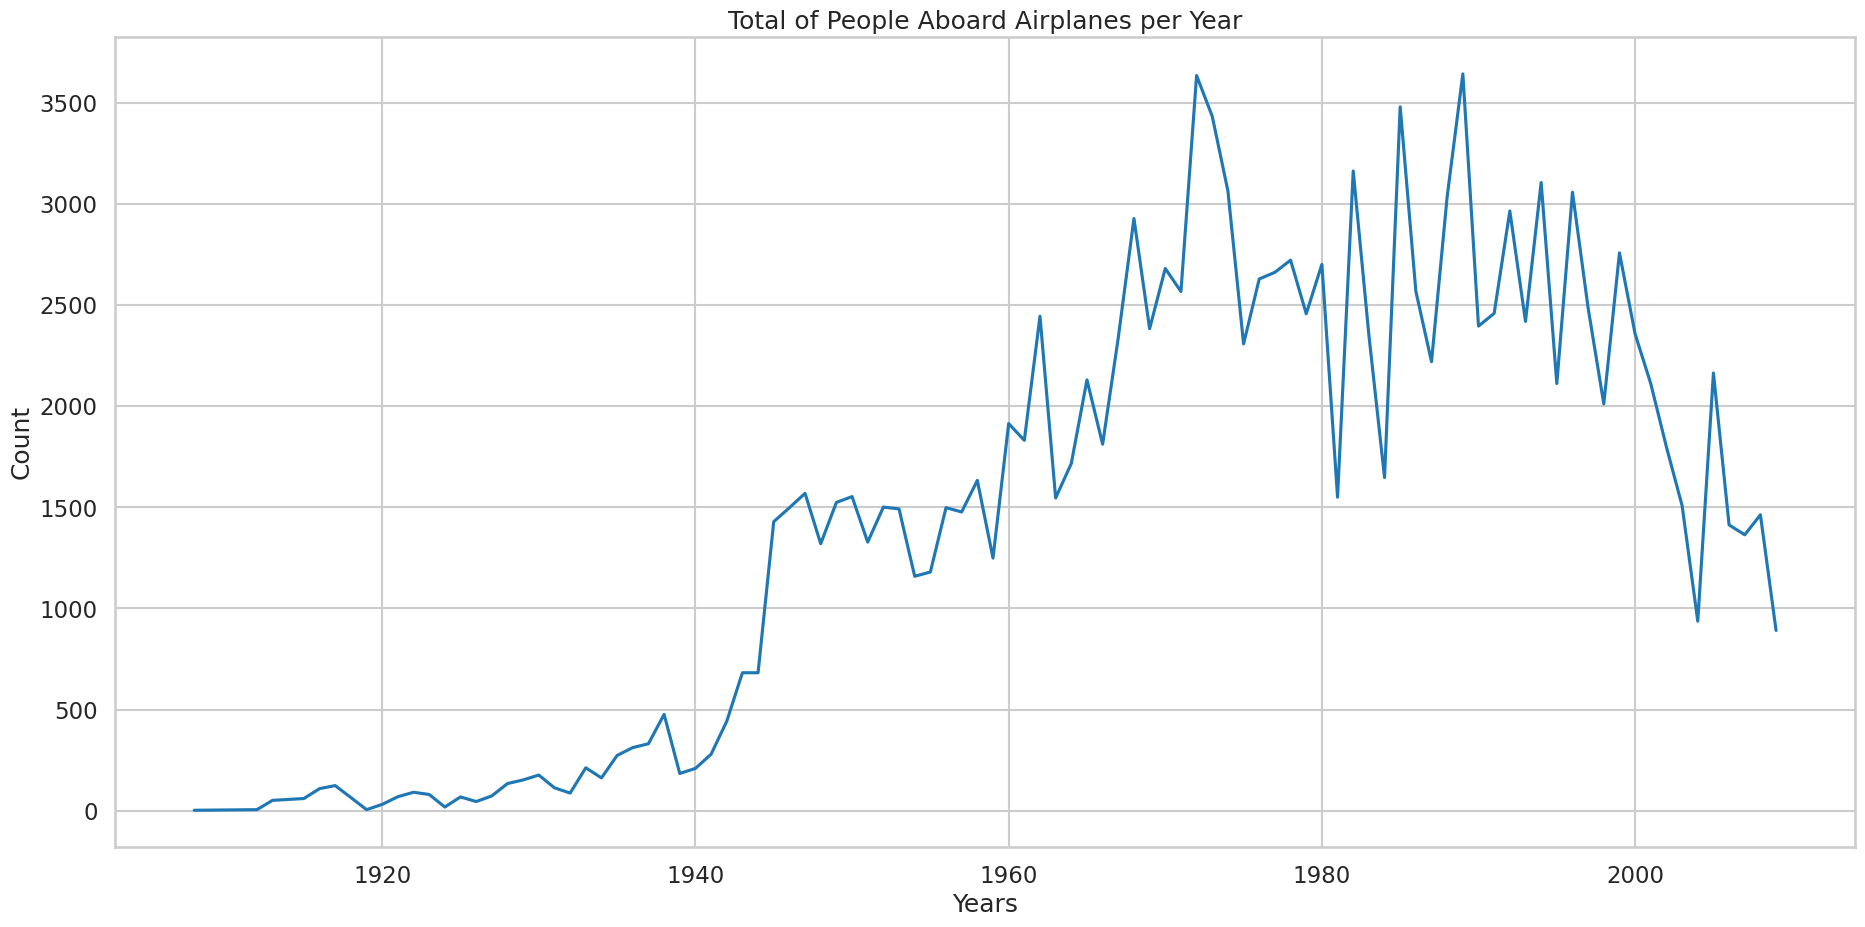

In [ ]:
sns.lineplot(x = 'Year', y = 'Aboard', data = abrd_per_year)
plt.title('Total of People Aboard Airplanes per Year')
plt.xlabel('Years')
plt.ylabel('Count')

En los años 40, hay un aumento significativo de accidentes aéreos, lo que probablemente debe deberse a la Segunda Guerra Mundial (1939 - 1945). Los picos más altos se dan entre 1960 y 2000. El año con más accidentes es 1972, con 104 sucesos.

**Muertes vs. sobrevivientes y muertos en tierra**

Ahora visualizamos cómo se compara el número de víctimas mortales con el número de supervivientes y los que murieron en el terreno.

In [ ]:
FSG_per_year = df[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()

Text(0.5, 1.0, 'Fatalities vs Survived vs Killed on Ground per Year')

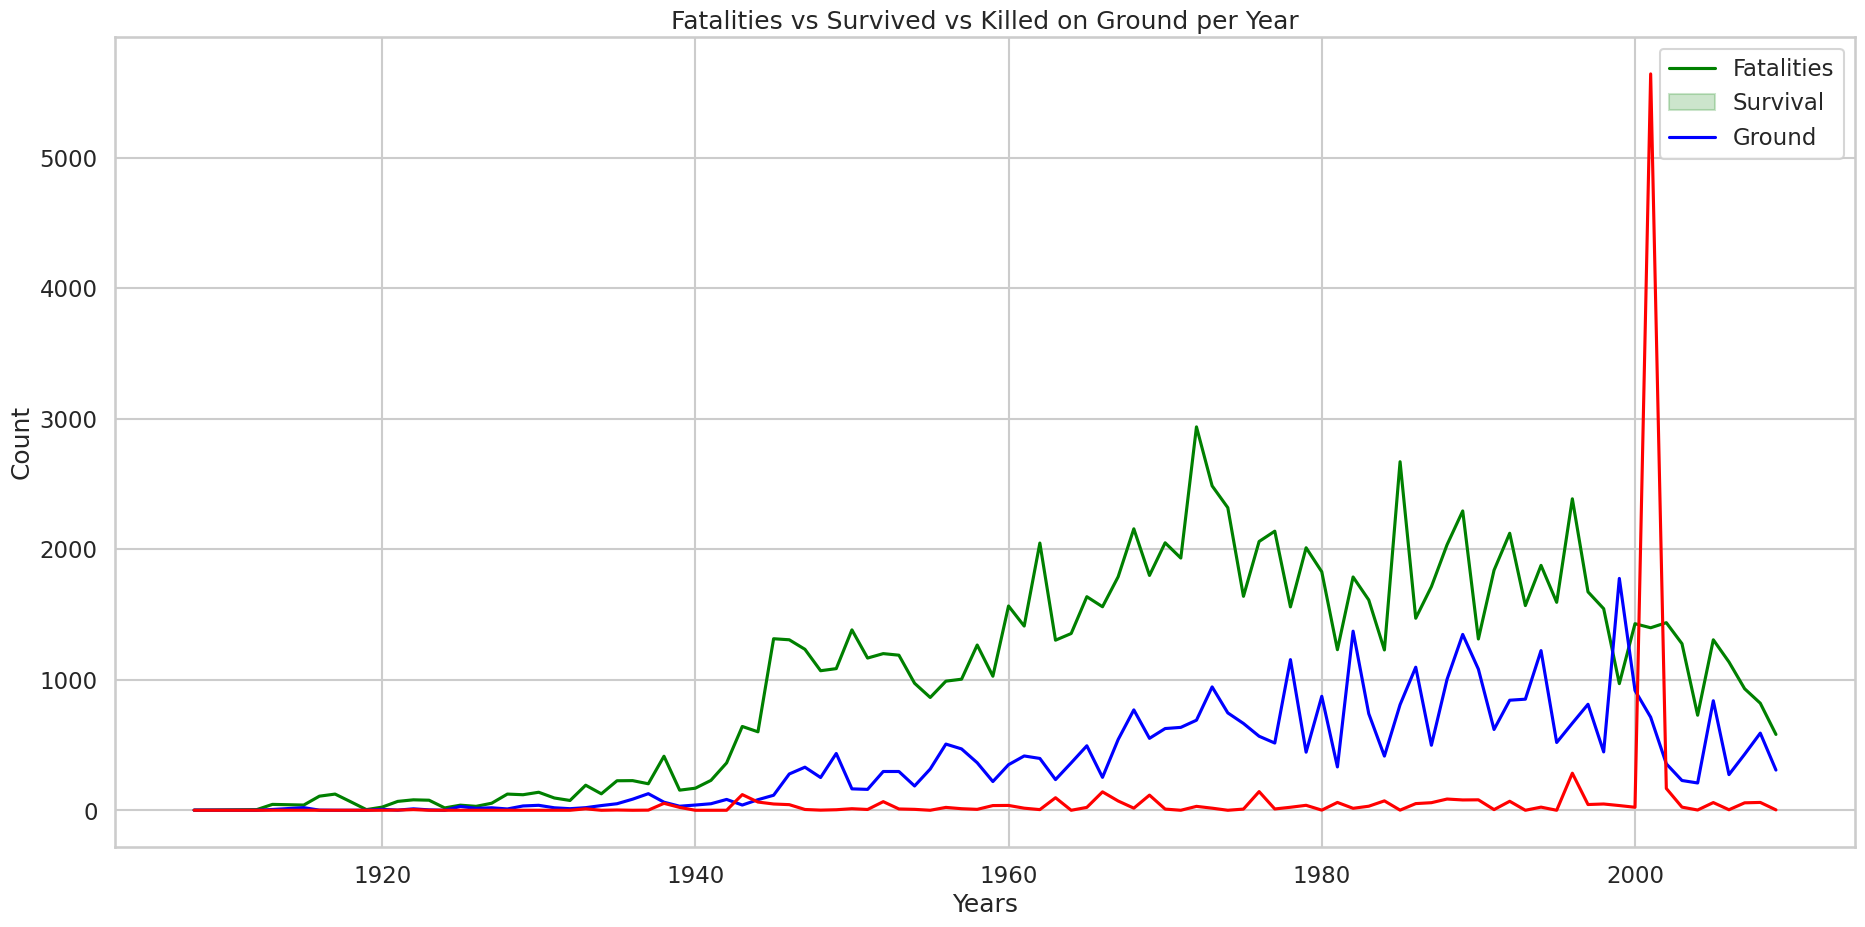

In [ ]:
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year, color = 'green')
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year, color = 'blue')
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year, color = 'red')
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')


(Respuesta C) - Ahora sí, podemos ver que a principio de los 2000 (2001) fue donde más muerte por tierra hubo, eso se debe al ataque a las torres gemelas

**Peores operador aereo**

In [ ]:
oper_list = Counter(df['Operator']).most_common(10)
operators = []
crashes = []
for tpl in oper_list:
    if 'Military' not in tpl[0]:
        operators.append(tpl[0])
        crashes.append(tpl[1])
print('Top 10 the worst operators')
pd.DataFrame({'Count of crashes' : crashes}, index=operators)

Top 10 the worst operators


,Count of crashes
Aeroflot,179
Air France,70
Deutsche Lufthansa,65
China National Aviation Corporation,44
United Air Lines,44
Air Taxi,44
Pan American World Airways,41


(Respuesta D)  Aeroflot con un total de 179 accidentes

In [ ]:
loc_list = Counter(df['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
print('Top 10 the most dangerous locations')
pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

Top 10 the most dangerous locations


,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


**Peores accidente aereos**

(Respuesta E) Los países más peligrosos con mayor porcentaje de accidentes son San Pablo, Brasil y Moscú, Rusia


## **Correlacion**

Calculemos los coeficientes de correlación para estas dos variables.

In [ ]:
sts.pearsonr(df.Fatalities, df.Aboard)

PearsonRResult(statistic=0.7569242287226606, pvalue=0.0)

In [ ]:
sts.spearmanr(df.Fatalities, df.Aboard)

SignificanceResult(statistic=0.7729747858599402, pvalue=0.0)

Los coeficientes sugieren una correlación bastante alta entre el número de víctimas mortales y las personas a bordo. Visualicemos esta relación.

Text(0.5, 1.0, 'Muertes por personas a bordo')

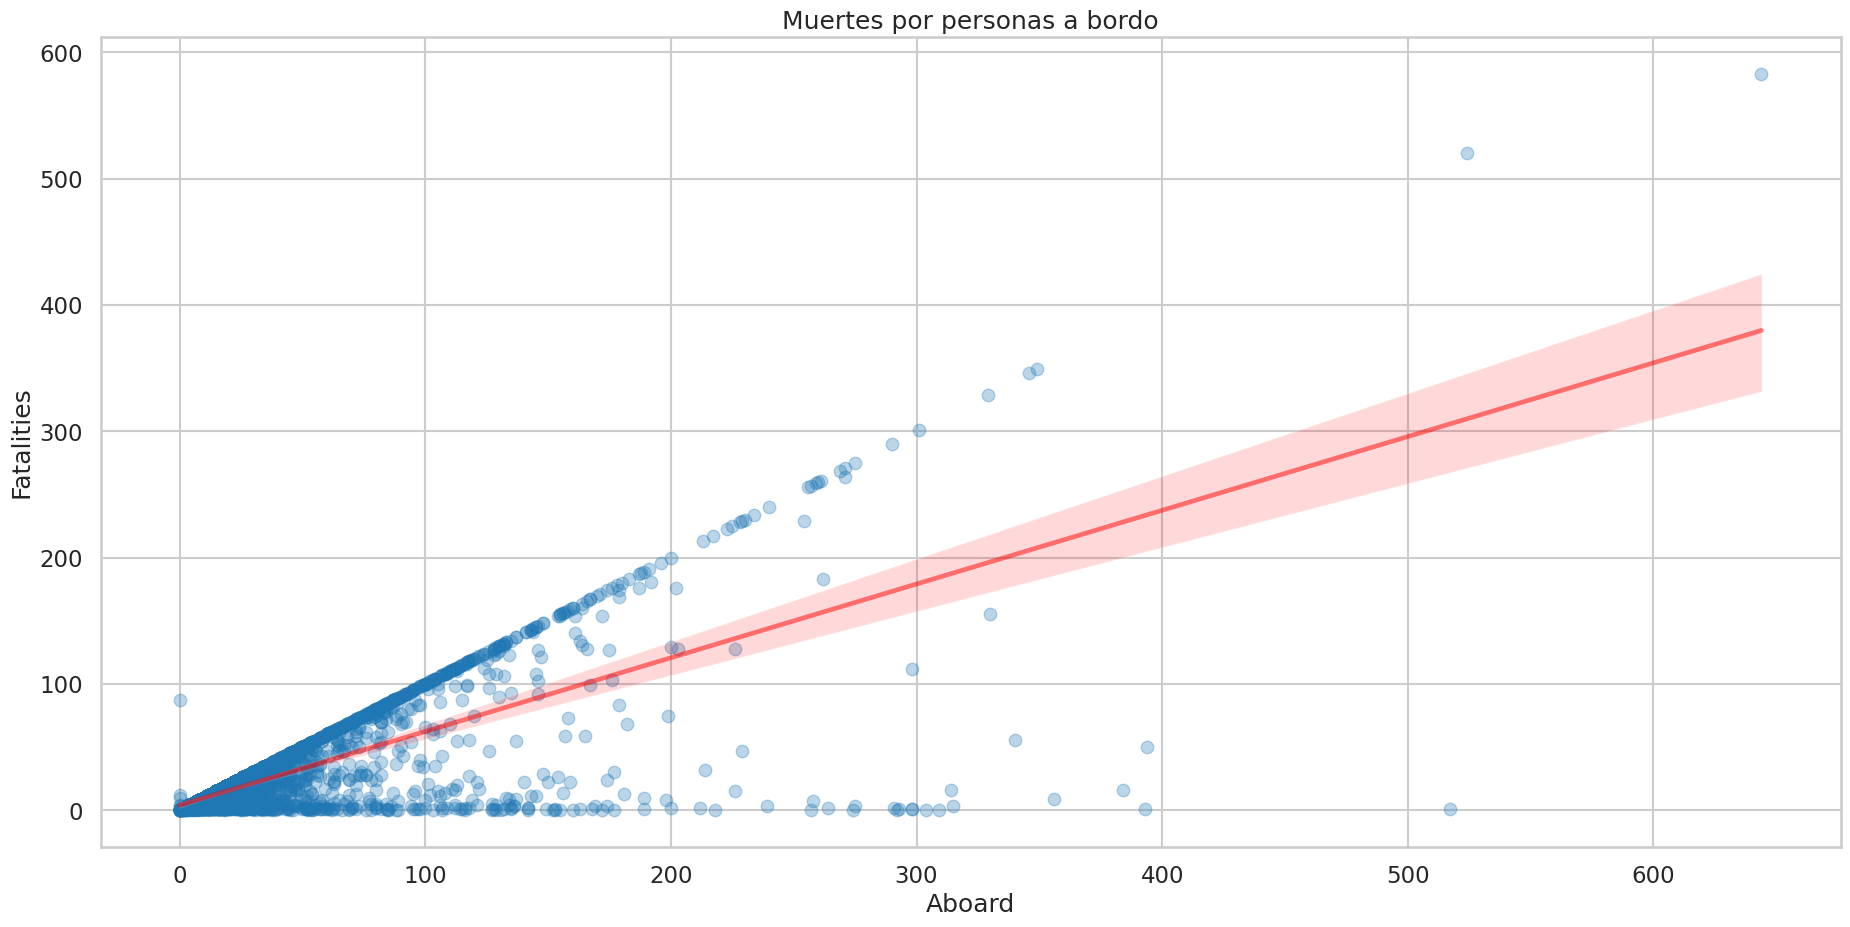

In [ ]:
sns.regplot(x = 'Aboard', y = 'Fatalities', data = df, scatter_kws=dict(alpha = 0.3), line_kws=dict(color = 'red', alpha = 0.5))
plt.title('Muertes por personas a bordo')

# SATISFACCION DE LOS PASAJEROS - DATA ACQUISITION
Cargando y preparando los datos para el análisis.



In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, distplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

DATA ACQUISITION

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coder house/Coder house Data sience/Proyecto final/train.csv')
df.head(30)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied





Lo primero que haré será cambiar el texto en dos columnas. En primer lugar, el lenguaje de la columna "Customer Type" es bastante irregular; No está claro qué caracteriza a un cliente "desleal". Por lo tanto, para mayor claridad, etiquetaré a los clientes como "regulares e irregulares". En segundo lugar, On-board service" y "inflight service" pueden confundirse con la misma cosa. Por lo tanto, llamaré al "on-board service" "boarding service" para que esta distinción sea más clara..


Empezare analizar el DataFrame

Para mostrar todo el conjunto de datos
Add


In [ ]:
pd.set_option('display.max_columns',35)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

DESCRIPCION DE LA VARIABLE Y DOMINIO

ID: Identificador.

Gender - Genero.

Age - Edad.

Customer Type - Tipo de cliente.

Type of Travel - Tipo de viaje.

Class - Clase.

Flight Distance - Distancia de vuelo.

Departure Delay - Retraso de salida.

Arrival Delay in Minutes - Retraso de llegada en minutos.

Departure and Arrival Time Convenience - Comodidad de la hora de salida y de llagada.

Ease of Online Booking - Facilidad de reserva en línea.

Check-in Service - Servicio de facturación.

Online Boarding - Embarque en línea.

Gate Location - Ubicación de la puerta.

On-board Service - Servicio a bordo.

Seat Comfort - Confort de los asientos.

Leg Room Service - Servicio de habitaciones para piernas.

Cleanliness - Limpieza.

Food and Drink - Comida y bebida.

In-flight Service - Servicio a bordo.

In-flight Wifi Service - Servicio Wifi a bordo.

In-flight Entertainment - Entretenimiento a bordo.

Baggage Handling - Manejo de equipaje.

Satisfaction - Satisfacción.




    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Hay algunas cosas a tener en cuenta en términos de limpieza de datos:

1- La columna Arrival Delay in Minutes" tiene 129487-129880 = 393 valores faltantes.

2- La primera columnas es innecesarias, ya que no es relevantes para el análisis.

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


La media, la desviación estándar, el mínimo y el máximo, así como los valores de la mediana y el cuartil se proporcionan arriba para cada atributo cuantitativo.

In [ ]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [ ]:
df.isnull().values.any()

True

In [ ]:
df['Arrival Delay in Minutes'].mean()

15.178678301832152

<Axes: xlabel='Arrival Delay in Minutes'>

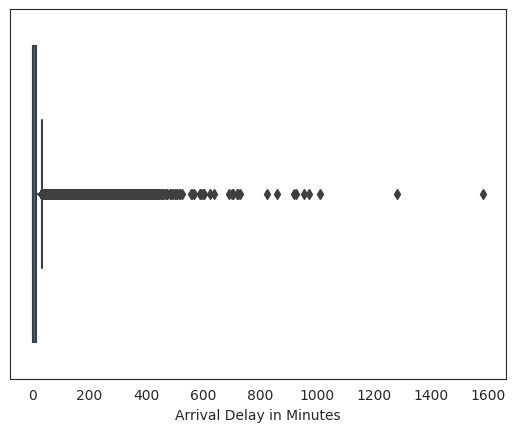

In [ ]:
sns.boxplot(x='Arrival Delay in Minutes',data = df)

In [ ]:
df['Arrival Delay in Minutes'].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

A pesar de que la media de la columna 'Arrival Delay' es 15,04 ​​podemos ver en el diagrama de caja que casi cualquier valor excepto 0 es un valor atípico. La moda de la columna es 0 por un amplio margen y los 393 valores faltantes son pocos en comparación con la gran cantidad de entradas totales. Al considerar esto junto con la mayoría de los valores que son valores atípicos distintos de 0, completaré los valores nulos de la columna Arrival Delay con 0.

In [ ]:
df.fillna(0,inplace = True)
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

También voy a agregar una nueva columna a los datos, que muestra la calificación promedio, de 1 a 5, que un cliente le ha otorgado a la aerolínea en todas las categorías. Esto sería útil para evaluar una calificación "general" de cada cliente para la aerolínea.

In [ ]:
df['Average'] = df.iloc[:,list(range(6,20))].mean(axis=1,)
print(df.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Average'],
      dtype='object')


<ipython-input-140-2a58dd412557>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Average'] = df.iloc[:,list(range(6,20))].mean(axis=1,)


Ya no faltan valores en los datos y se ha agregado una columna de promedio.

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Average
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,38.769231
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,20.153846
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,91.153846
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,46.000000
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,19.769231


**Preparar datos para el análisis.**


Lo primero que haré será cambiar el texto en dos columnas. En primer lugar, el lenguaje de la columna "Customer Type" es bastante irregular; No está claro qué caracteriza a un cliente "desleal". Por lo tanto, para mayor claridad, etiquetaré a los clientes como "regulares e irregulares". En segundo lugar, On-board service" y "inflight service" pueden confundirse con la misma cosa. Por lo tanto, llamaré al "on-board service" "boarding service" para que esta distinción sea más clara.

Cambiar el nombre de la columna

In [ ]:
df = df.rename(columns={'On-board service': 'Boarding service'})


Cambiar los tipos de clientes a viajeros regulares e irregulares.

In [ ]:
df['Customer Type'].replace('Loyal Customer', 'Regular Flyer', inplace=True)
df['Customer Type'].replace('disloyal Customer', 'Irregular Flyer', inplace=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Boarding service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Average
0,0,70172,Male,Regular Flyer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,38.769231
1,1,5047,Male,Irregular Flyer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,20.153846
2,2,110028,Female,Regular Flyer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,91.153846
3,3,24026,Female,Regular Flyer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,46.000000
4,4,119299,Male,Regular Flyer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,19.769231


In [ ]:
df = df.drop(labels = ['Unnamed: 0','id'], axis = 1)

[Text(0.5, 1.0, 'Distribución de la distancia de vuelo por clase')]

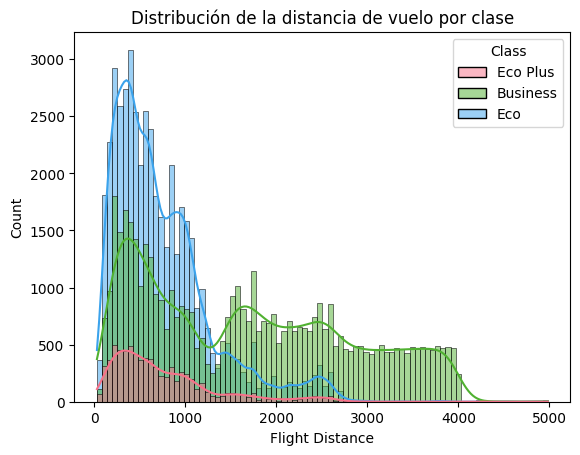

In [ ]:
sns.histplot(x='Flight Distance',data=df,hue='Class',kde=True,palette='husl').set(title='Distribución de la distancia de vuelo por clase')

También podemos ver que a medida que aumenta la distancia del vuelo, más personas toman clase Business que Econ o Eco Plus. Sin embargo, para distancias cortas, especialmente aquellas de menos de 1000 millas, la clase Turista es, con diferencia, la opción más popular. Economy Plus es consistentemente la opción menos popular entre las clases de vuelo.

Data Viz

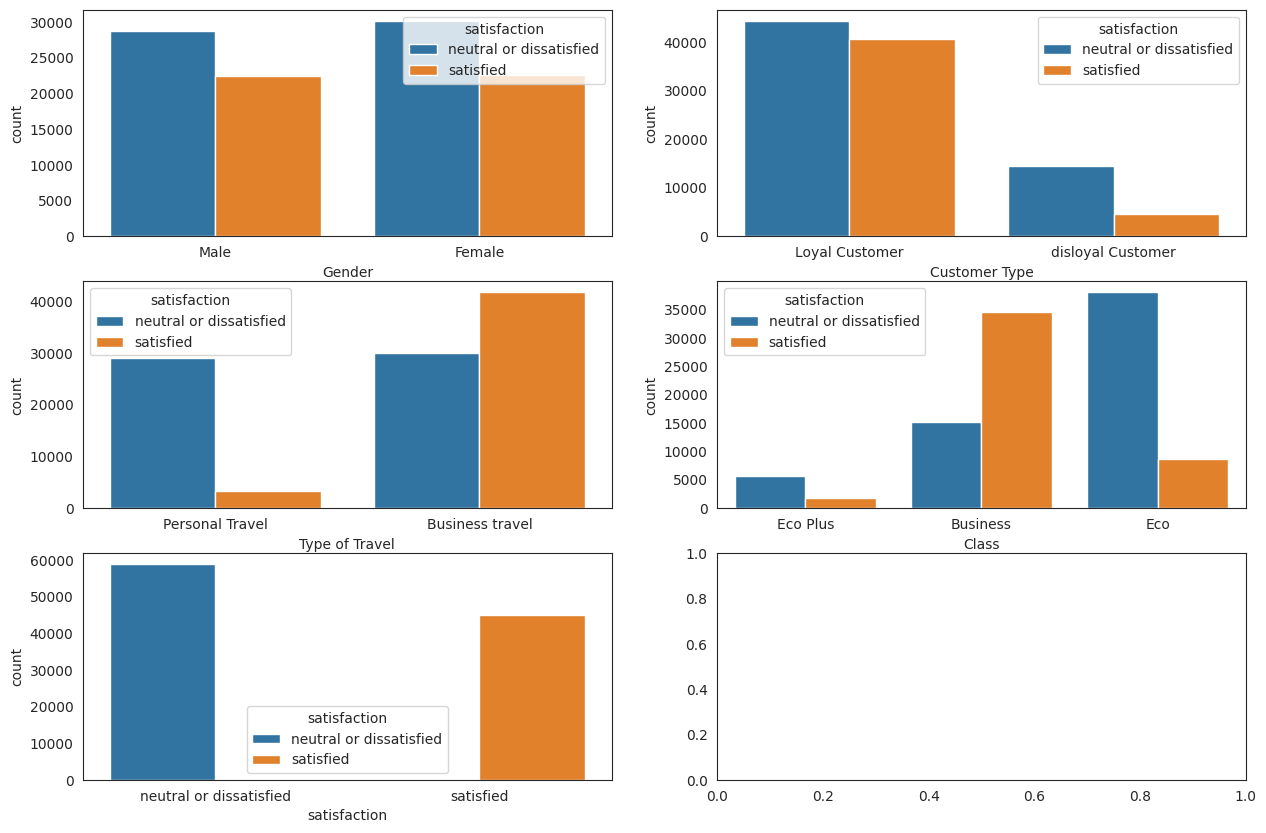

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

scols = df.select_dtypes(object).columns

for ax, col in zip(ax.flatten(), scols):
    sns.countplot(df, x=col, ax=ax, hue='satisfaction')

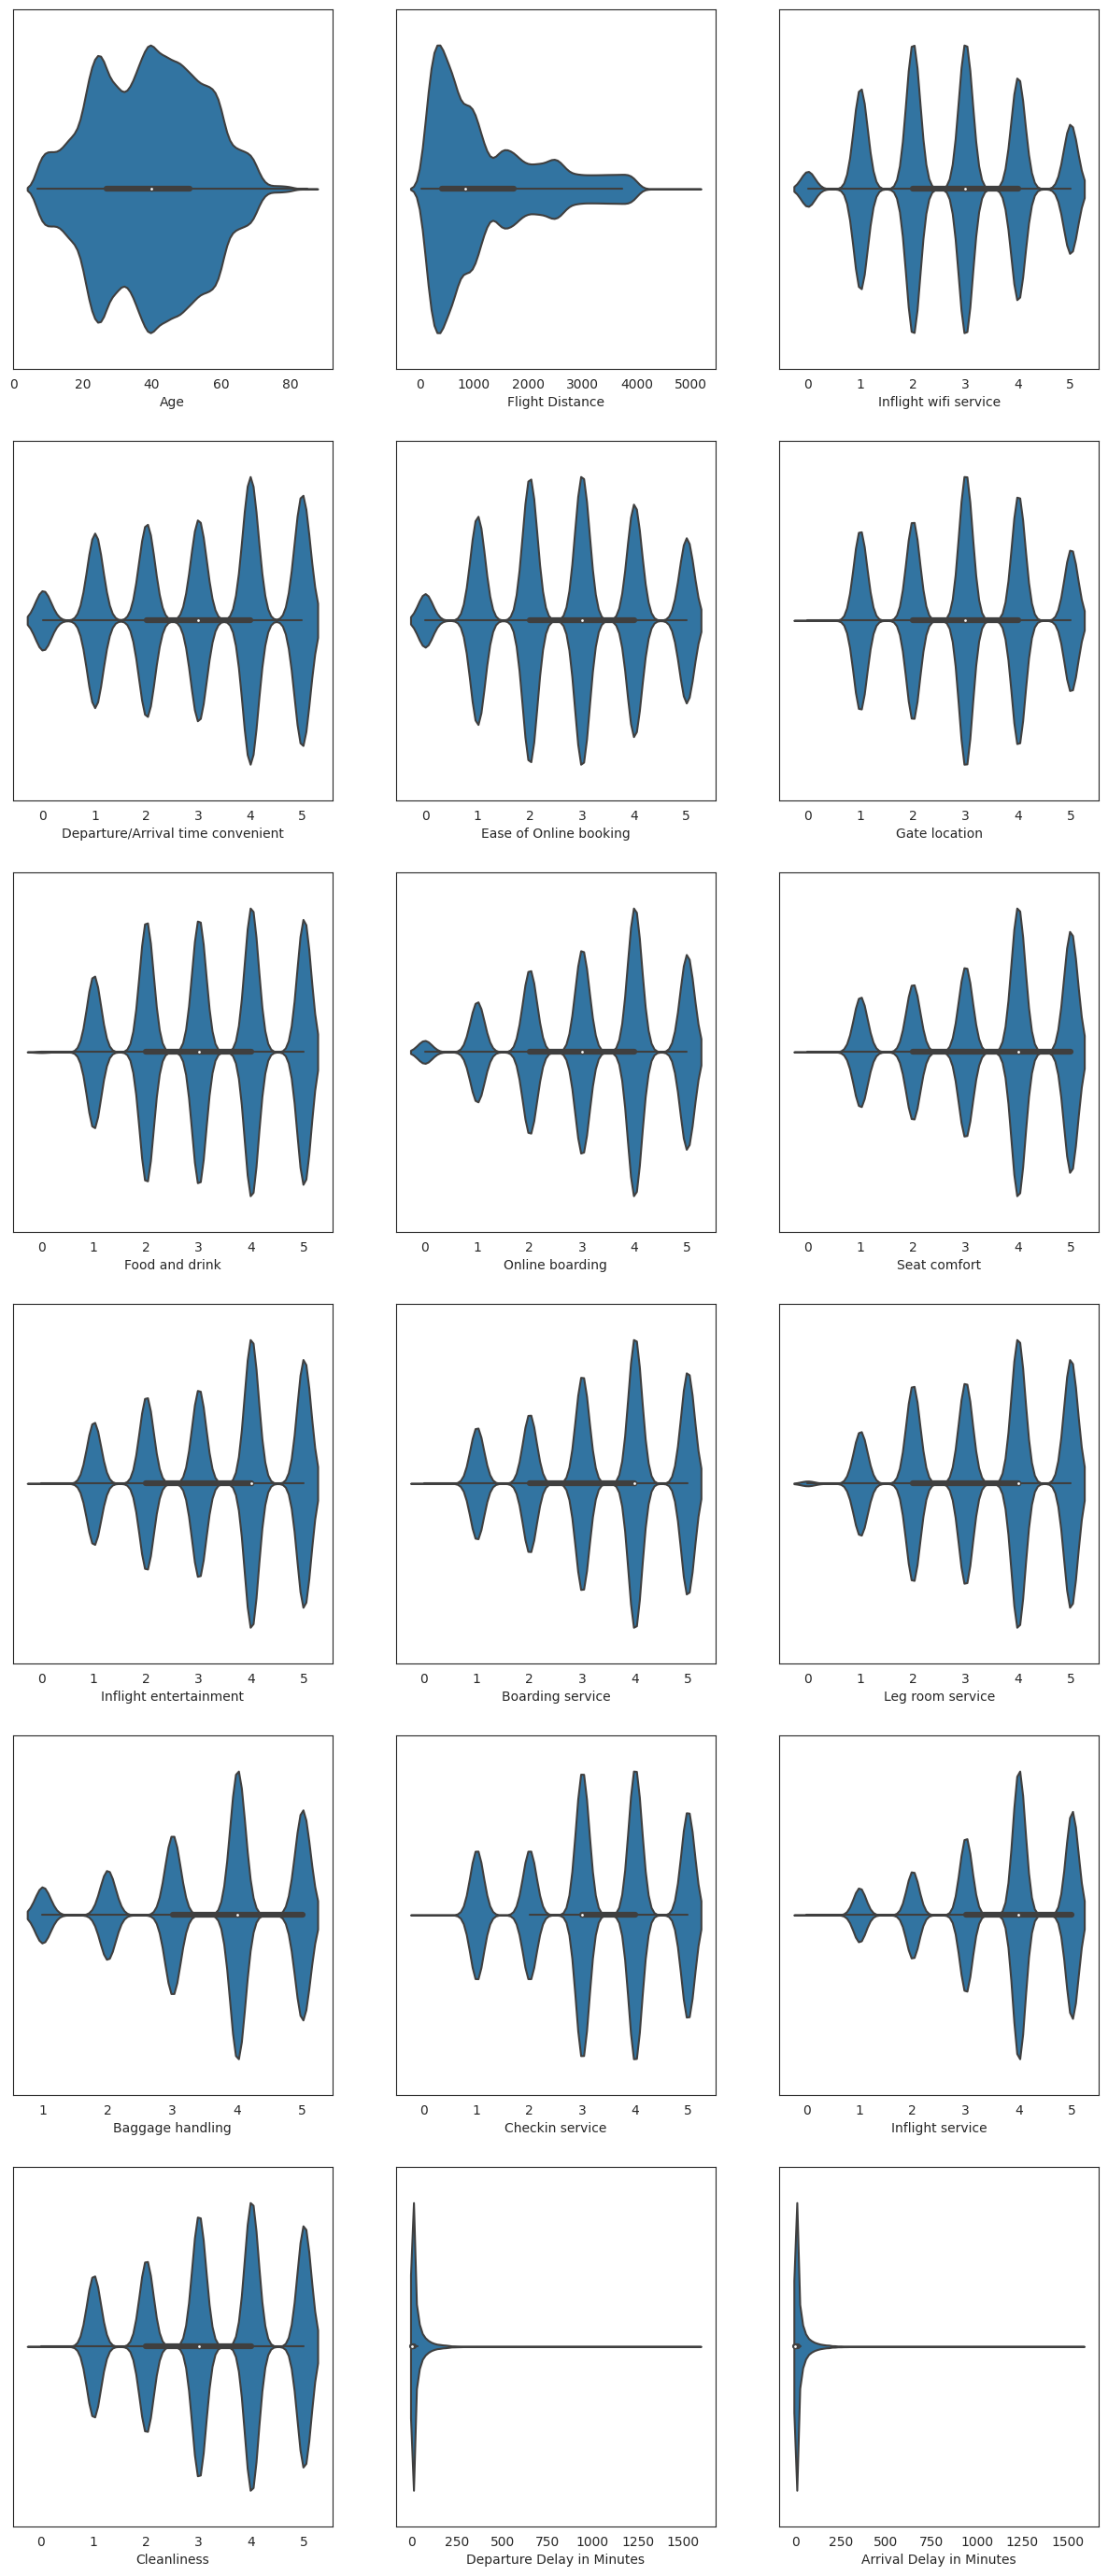

In [ ]:
ncols = df.select_dtypes('number').columns

fig, ax = plt.subplots(6, 3, figsize=(15, 35))

for ax, col in zip(ax.flatten(), ncols):
    sns.violinplot(df, x=col, ax=ax)

**La columna más importante del conjunto de datos es la satisfacción final del cliente, ya sea que esté satisfecho o sea neutral/insatisfecho. Sería útil ver la distribución general de la satisfacción en el conjunto de datos.**

In [ ]:
df.head(30)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Boarding service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Average
0,Male,Regular Flyer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,38.769231
1,Male,Irregular Flyer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,20.153846
2,Female,Regular Flyer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,91.153846
3,Female,Regular Flyer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,46.000000
4,Male,Regular Flyer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,19.769231
5,Female,Regular Flyer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied,93.076923
6,Male,Regular Flyer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied,100.615385
7,Female,Regular Flyer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied,160.692308
8,Female,Regular Flyer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied,67.615385
9,Male,Irregular Flyer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied,84.384615


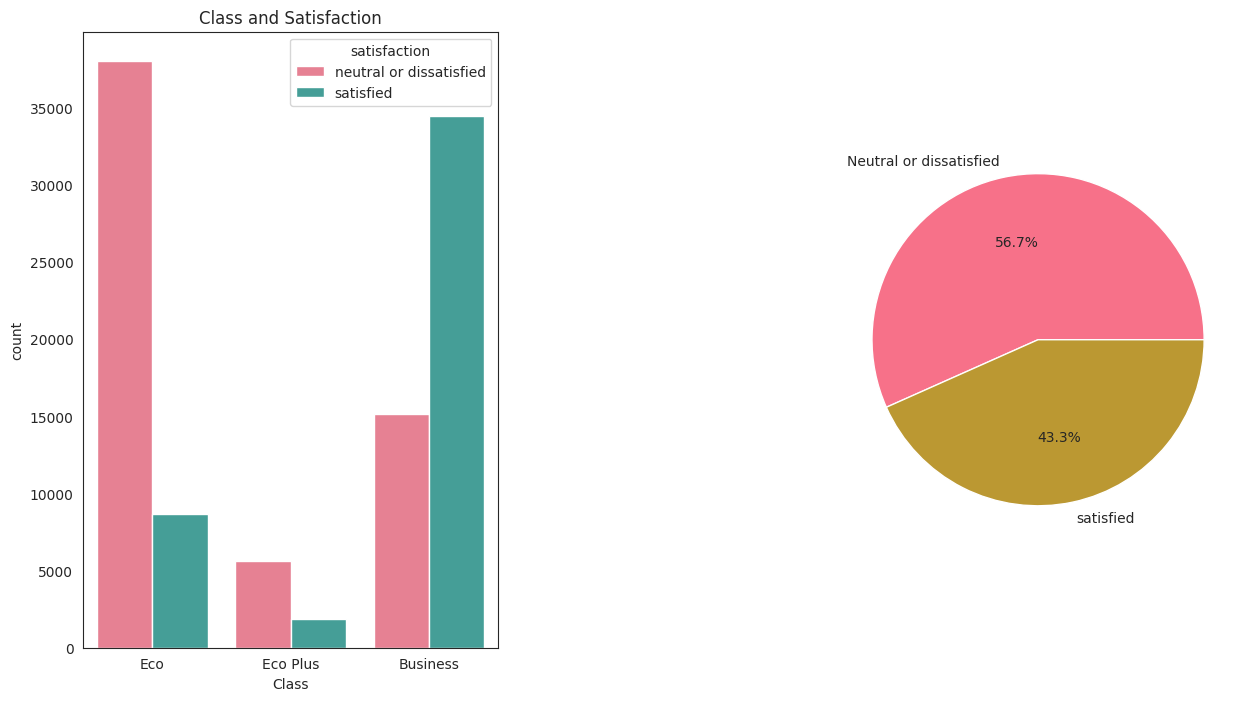

In [ ]:
sns.set_style("white")
fig,ax = plt.subplots(1,2,figsize = (15,8))

plt.subplots_adjust(hspace = 0.7, wspace=0.8)

sns.countplot(x='Class',data = df, hue = 'satisfaction', order=['Eco', 'Eco Plus','Business'], palette='husl', ax = ax[0])
ax[0].set_title('Class and Satisfaction')

ax[1]=plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "satisfied"], colors = sns.color_palette("husl"), autopct = '%1.1f%%')
pass

El 56,7% de los pasajeros encuestados se mostraron neutrales o insatisfechos, el resto satisfechos con la aerolínea. Es razonable suponer que la clase en la que viajan los pasajeros afecta su satisfacción, lo que se corrobora con el diagrama de barras de la izquierda. Economy y Economy Plus tienden a tener más clientes neutrales o insatisfechos que clientes satisfechos, mientras que Business Class tiene más clientes satisfechos que insatisfechos. En particular, Economy Plus tiene el recuento más bajo, por lo tanto, hay una distribución desigual en la clase de clientes en el conjunto de datos; sin embargo, esto también puede deberse a que Economy Plus generalmente es el que menos vuela.

La valoración media de los clientes neutrales o insatisfechos ronda el 2,95, mientras que la valoración media de los clientes satisfechos es de 3,62. La distribución de las calificaciones promedio se puede ver a continuación:

Calificaciones promedio cuando el cliente está satisfecho

In [ ]:
df[df['satisfaction'] == 'satisfied']['Average'].describe()

count    45025.000000
mean       121.004112
std         86.833913
min          4.615385
25%         43.615385
50%         99.615385
75%        188.615385
max        386.923077
Name: Average, dtype: float64

Calificaciones promedio cuando el cliente es neutral o insatisfecho

In [ ]:
df[df['satisfaction'] != 'satisfied']['Average'].describe()

count    58879.000000
mean        74.149633
std         60.771923
min          4.538462
25%         31.307692
50%         54.384615
75%         91.615385
max        386.307692
Name: Average, dtype: float64

Calificaciones promedio generales

In [ ]:
df['Average'].describe()

count    103904.000000
mean         94.453211
std          76.806523
min           4.538462
25%          34.692308
50%          67.692308
75%         136.769231
max         386.923077
Name: Average, dtype: float64

De hecho, puede observar que el valor máximo para clientes neutrales o insatisfechos es una calificación de 386.92, que es anormalmente alta y se esperaría que arrojara una calificación de satisfacción, ya que esto implica que hubo calificaciones altas en todas las categorías. En una nota similar, la persona con la calificación promedio general más baja de 25.84 indicó que de hecho estaba satisfecha con la aerolínea, a pesar de que este valor era inferior a la calificación promedio mínima para aquellos que eran neutrales o insatisfechos.

[Text(0.5, 1.0, 'Boxplot de calificaciones promedio')]

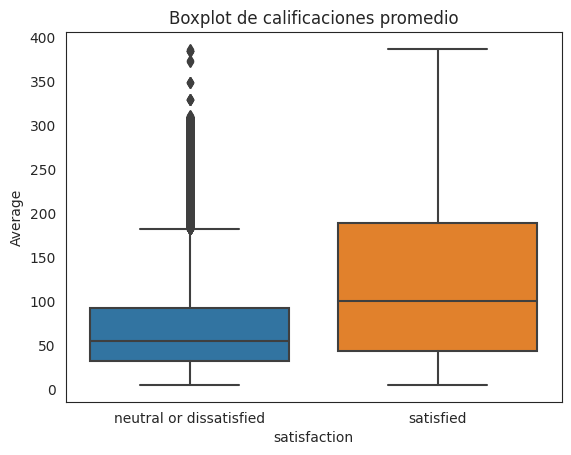

In [ ]:
sns.boxplot(y='Average', x='satisfaction',data=df).set(title="Boxplot de calificaciones promedio")

Sin embargo, el diagrama de caja sugiere que hay muchos valores extremos y atípicos que no representan la tendencia en el resto del conjunto de datos, lo cual es importante tener en cuenta. Teniendo en cuenta la presencia de valores atípicos, podemos ver que la calificación media de los clientes satisfechos es claramente superior a la de los clientes neutrales o insatisfechos, difiriendo sus valores medios en alrededor de 27.23. Por lo tanto, los números del resumen de datos no brindan una imagen completa, ya que el diagrama de caja era necesario para visualizar los valores atípicos en un conjunto de datos tan grande. Dicho esto, no podemos asumir que 27.00 es siempre neutral y que todo lo que está por encima de esto está satisfecho y todo lo que está por debajo está insatisfecho. Los cuartiles superior e inferior de cada nivel de satisfacción muestran esto: ciertos clientes tienen calificaciones promedio superiores a 39.46 y están insatisfechos/neutrales, y otros tienen calificaciones promedio inferiores a 27.23 y están satisfechos. Puede haber factores que no se exploraron en los datos que contribuyen a que un cliente esté satisfecho o no. La calificación promedio también supone que los clientes dan la misma importancia a cada categoría al evaluar su satisfacción general, lo que puede no ser el caso: pueden priorizar ciertos factores sobre otros. Sería más beneficioso desglosar los datos según cada factor individual, en lugar de los promedios en su conjunto.

# FATURE ENGENEERING

## Balanceo del dataset

In [ ]:
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1})
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})
df['Gender'].value_counts()

1    52727
0    51177
Name: Gender, dtype: int64

In [ ]:
df['Customer Type'] = df['Customer Type'].replace({'First-time':0, 'Returning':1})
df['Customer Type'].value_counts()

Regular Flyer      84923
Irregular Flyer    18981
Name: Customer Type, dtype: int64

In [ ]:
df['Type of Travel'] = df['Type of Travel'].replace({'Personal':0, 'Business':1})
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [ ]:
df['Class'] = df['Class'].replace({'Eco':0, 'Business':1, "Eco Plus":2})
df['Class'].value_counts()

1    49665
0    46745
2     7494
Name: Class, dtype: int64

In [ ]:
df.dtypes

Gender                                 int64
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
Boarding service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
df.isnull().values.any()

False

In [ ]:
features= list(df.columns[0:13])
features

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort']

In [ ]:
df= df[features + ['satisfaction']]
df.head(20)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,satisfaction
0,0,Regular Flyer,13,Personal Travel,2,460,3,4,3,1,5,3,5,0
1,0,Irregular Flyer,25,Business travel,1,235,3,2,3,3,1,3,1,0
2,1,Regular Flyer,26,Business travel,1,1142,2,2,2,2,5,5,5,1
3,1,Regular Flyer,25,Business travel,1,562,2,5,5,5,2,2,2,0
4,0,Regular Flyer,61,Business travel,1,214,3,3,3,3,4,5,5,1
5,1,Regular Flyer,26,Personal Travel,0,1180,3,4,2,1,1,2,1,0
6,0,Regular Flyer,47,Personal Travel,0,1276,2,4,2,3,2,2,2,0
7,1,Regular Flyer,52,Business travel,1,2035,4,3,4,4,5,5,5,1
8,1,Regular Flyer,41,Business travel,1,853,1,2,2,2,4,3,3,0
9,0,Irregular Flyer,20,Business travel,0,1061,3,3,3,4,2,3,3,0


In [ ]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [ ]:
df = df.sample(len(df), random_state = 42)
df


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,satisfaction
80638,1,Regular Flyer,26,Personal Travel,0,861,2,4,2,5,5,2,5,0
43398,0,Regular Flyer,22,Business travel,1,393,3,5,5,5,3,3,3,0
32751,1,Regular Flyer,59,Personal Travel,0,196,1,3,1,3,2,3,3,0
33571,1,Regular Flyer,32,Personal Travel,0,1020,2,3,2,4,4,2,4,0
71287,0,Irregular Flyer,35,Business travel,1,1117,2,2,2,1,2,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,0,Irregular Flyer,39,Business travel,0,637,3,5,3,5,3,3,3,0
76820,0,Regular Flyer,17,Personal Travel,0,646,3,4,3,1,3,3,2,0
103694,0,Regular Flyer,46,Business travel,0,1197,1,2,2,2,1,1,1,0
860,1,Regular Flyer,37,Business travel,0,320,5,5,5,5,5,5,5,1


In [ ]:
df['Customer Type'].replace(['Regular Flyer', 'Irregular Flyer'], [1, 2], inplace=True)
df['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1], inplace=True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,satisfaction
80638,1,1,26,0,0,861,2,4,2,5,5,2,5,0
43398,0,1,22,1,1,393,3,5,5,5,3,3,3,0
32751,1,1,59,0,0,196,1,3,1,3,2,3,3,0
33571,1,1,32,0,0,1020,2,3,2,4,4,2,4,0
71287,0,2,35,1,1,1117,2,2,2,1,2,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,0,2,39,1,0,637,3,5,3,5,3,3,3,0
76820,0,1,17,0,0,646,3,4,3,1,3,3,2,0
103694,0,1,46,1,0,1197,1,2,2,2,1,1,1,0
860,1,1,37,1,0,320,5,5,5,5,5,5,5,1


Correlacion de las variables

<Axes: >

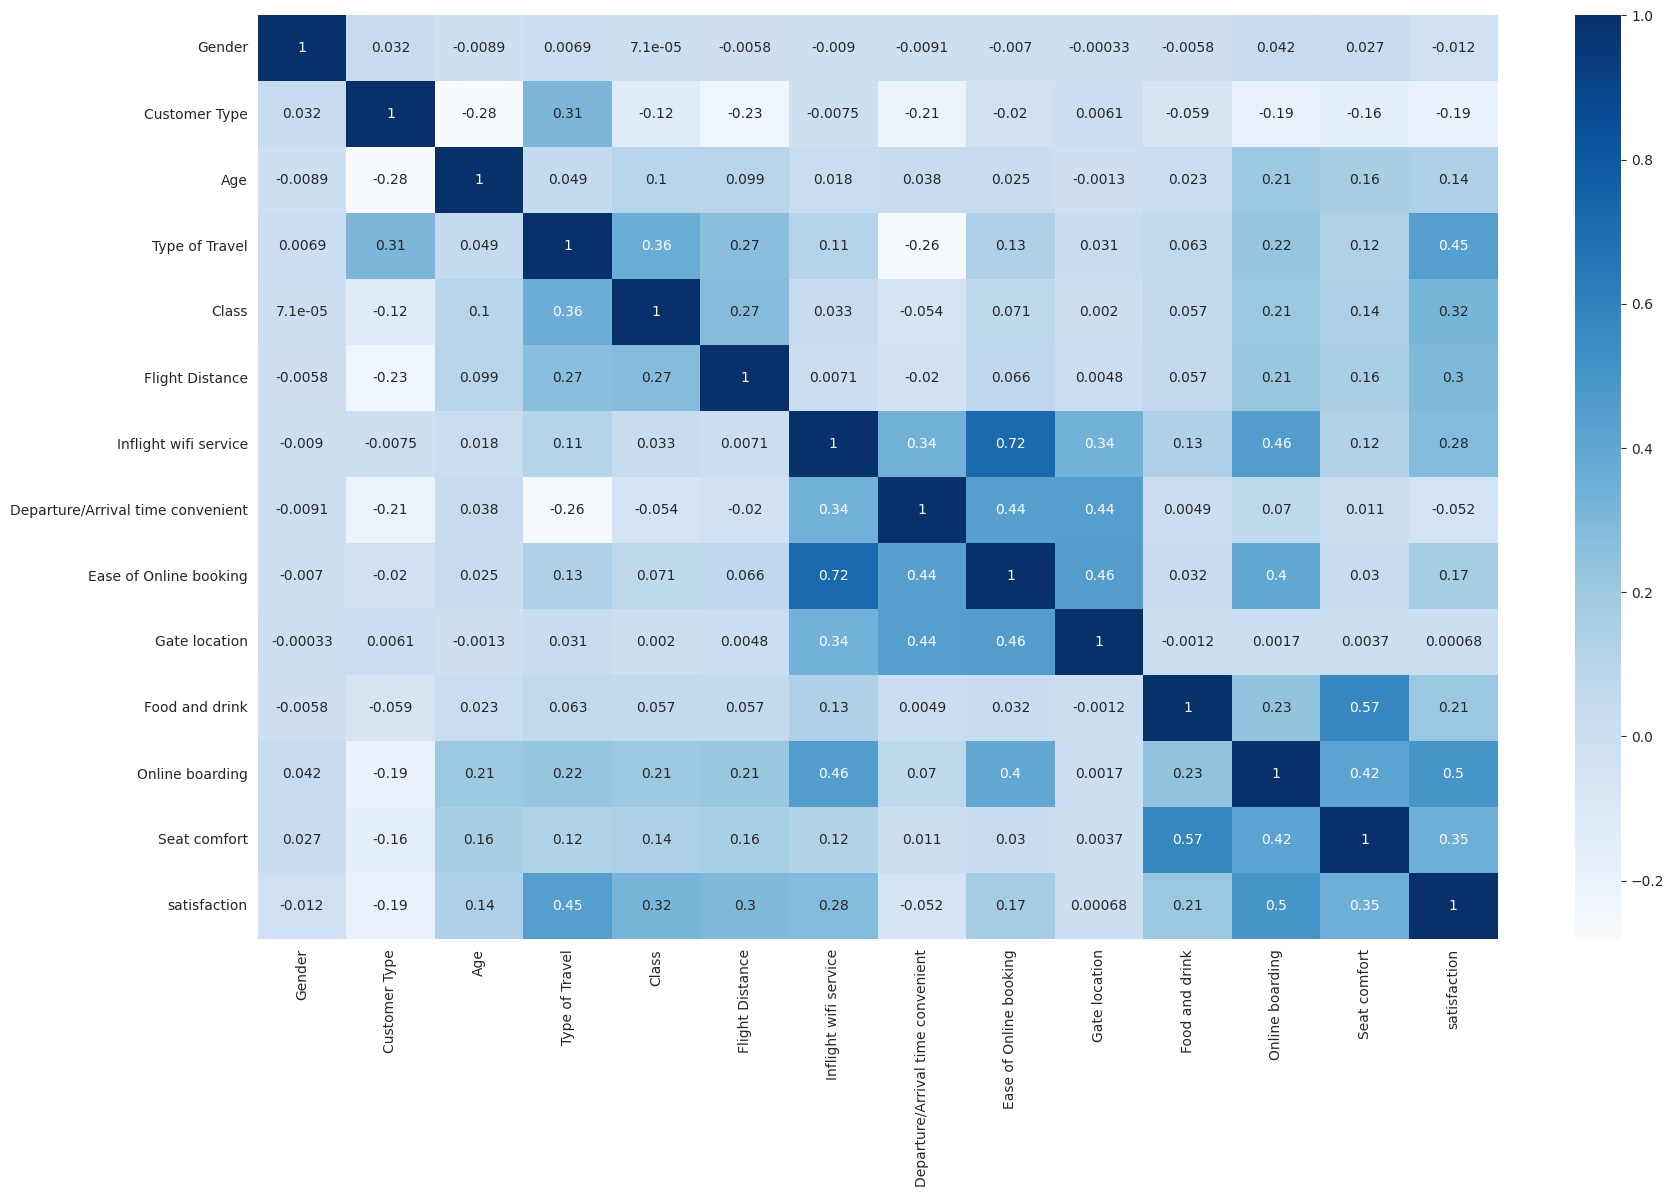

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), cmap="Blues", annot =True)

**Como podemos ver hay una fuerte relacion entre:**

1. In-flight Wifi Service & Ease of Online Booking = De todos los factores
individuales, las calificaciones tienen la relación positiva más fuerte. Sin embargo, todavía no es necesariamente una correlación fuerte ya que el valor de r es sólo 0,72

2. Food and Drink & Seat Comfort  Las calificaciones tienen una correlación positiva relativamente fuerte con las calificaciones de comida y bebida, comodidad de los asientos su r es solo 0,57

3. Online Boarding & Awat Confort tiene una calificacion alta y queda en 3°lugar con un valor de r  de 0,42


4. Satisfaction & Gate Location: La ubicación de la puerta tiene la relación más débil con la satisfacción (r=0,00068) En general, no hay muchas categorías que parezcan tener una relación significativamente fuerte en relación con otras con otra categoría, así como con la satisfacción total. Puede resultar beneficioso agrupar algunas de las categorías específicas en categorías ligeramente más amplias y calcular su relación con la satisfacción de una manera diferente, ya que los factores juntos pueden tener un impacto mayor en la satisfacción.

Ahora lo graficare para poder verlo de otra manera






## Correlación con variables encodeadas

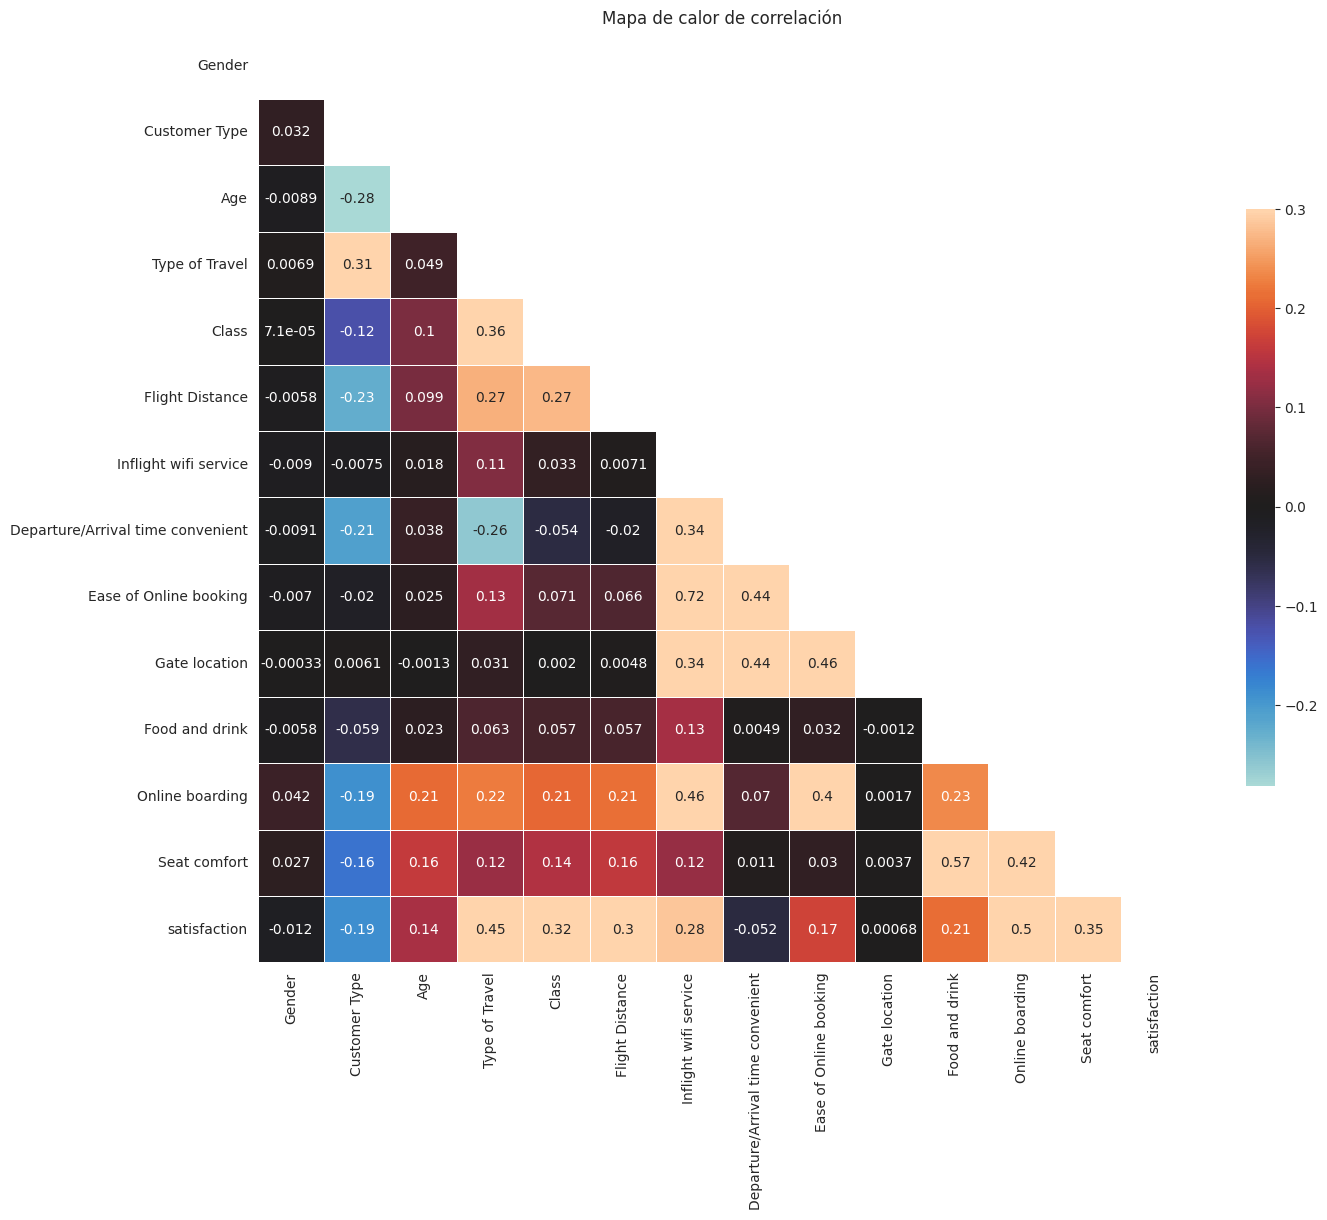

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot = True, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de calor de correlación')
plt.show()

In [ ]:
df.corr(numeric_only = True)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,satisfaction
Gender,1.000000,0.031732,-0.008928,0.006909,0.000071,-0.005828,-0.008974,-0.009142,-0.006951,-0.000333,-0.005772,0.042260,0.026502,-0.012211
Customer Type,0.031732,1.000000,-0.281674,0.308333,-0.122325,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,-0.059454,-0.189262,-0.159484,-0.187638
Age,-0.008928,-0.281674,1.000000,0.048524,0.101451,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.137167
Type of Travel,0.006909,0.308333,0.048524,1.000000,0.361468,0.267344,0.105085,-0.259763,0.133511,0.030700,0.063439,0.224803,0.124399,0.449000
Class,0.000071,-0.122325,0.101451,0.361468,1.000000,0.274786,0.033421,-0.054423,0.071248,0.001965,0.056650,0.205419,0.143746,0.320139
Flight Distance,-0.005828,-0.225200,0.099461,0.267344,0.274786,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.298780
Inflight wifi service,-0.008974,-0.007543,0.017859,0.105085,0.033421,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.284245
Departure/Arrival time convenient,-0.009142,-0.206869,0.038125,-0.259763,-0.054423,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.051601
Ease of Online booking,-0.006951,-0.019509,0.024842,0.133511,0.071248,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.171705
Gate location,-0.000333,0.006078,-0.001330,0.030700,0.001965,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.000682


In [ ]:
X = df.drop(['satisfaction'],axis=1)
y = df['satisfaction']

In [ ]:

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((77928, 13), (25976, 13))

In [ ]:
target = 'satisfaction'
features = [col for col in df.columns if(col != target)]
features

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort']

Voy a realizar 3 interacciones, la primea sera una interaccion simple

#Importamos librerias

## Install

In [ ]:
!pip install xgboost

In [ ]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git #skopt

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-vlx8xrs7
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-vlx8xrs7
  Resolved https://github.com/scikit-optimize/scikit-optimize.git to commit a2369ddbc332d16d8ff173b12404b03fea472492
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyaml-23.12.0-py3-none-any.whl (23 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100246 sha256=ee7023d40cc5abc704118f576acc2cbb30f37be659b657a9e5564121e1aac8cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2qei18m/wheels/2f/f0/ed/db529a96372d05bd34f6c3a2fa7c08ef7a8314315ac46e49d7
Successfully built scikit-optimize


In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import xgboost as xgb
import lightgbm as lgb

# MODELANDO

## Creamos nuestro objeto RF

In [ ]:
clf =  RandomForestClassifier()

# PRIMERA INTERACCIÓN

## GridSearch CV

### Definicion de Hyperparámetros

In [ ]:
param_grid = {'n_estimators': [100],
    'max_depth': [4,5,6],
    'min_samples_split': [4,5,6],
    'min_samples_leaf': [4, 6],
    'bootstrap': [True, False]  # Indica si se debe realizar bootstrap para construir los árboles
}


model_RF = GridSearchCV(clf, cv=3, param_grid=param_grid, scoring='f1', n_jobs=-1, verbose=3)

### KNN

In [ ]:
%%time
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
CPU times: user 9.06 s, sys: 973 ms, total: 10 s
Wall time: 5min 52s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 5, 6],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100]},
             scoring='f1', verbose=3)

In [ ]:
model_RF.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': -1,
 'param_grid': {'n_estimators': [100],
  'max_depth': [4, 5, 6],
  'min_samples_split': [4, 5, 6],
  'min_samples_leaf': [4, 6],
  'bootstrap': [True, False]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'f1',
 'verbose': 3}

In [ ]:
print("Mejores parametros: "+str(model_RF.best_params_))
print("Mejor Score: "+str(model_RF.best_score_)+'\n')

Mejores parametros: {'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}
Mejor Score: 0.8979243898715401



Veamos los resultados obtenidos

In [ ]:
scores = pd.DataFrame(model_RF.cv_results_)
scores.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
14,7.319692,0.472524,0.569820,0.157664,True,6,4,6,100,"{'bootstrap': True, 'max_depth': 6, 'min_sampl...",0.895638,0.898887,0.899249,0.897924,0.001623,1
30,6.476780,0.691200,0.459345,0.083009,False,6,4,4,100,"{'bootstrap': False, 'max_depth': 6, 'min_samp...",0.895185,0.900485,0.898049,0.897906,0.002166,2
33,5.144565,0.151904,0.419938,0.090165,False,6,6,4,100,"{'bootstrap': False, 'max_depth': 6, 'min_samp...",0.894428,0.899579,0.898556,0.897521,0.002226,3
15,5.566423,0.908398,0.534704,0.127547,True,6,6,4,100,"{'bootstrap': True, 'max_depth': 6, 'min_sampl...",0.893826,0.900131,0.898413,0.897456,0.002662,4
34,6.847633,1.270241,0.361243,0.003817,False,6,6,5,100,"{'bootstrap': False, 'max_depth': 6, 'min_samp...",0.893686,0.898817,0.899508,0.897337,0.002597,5
13,7.532513,1.346156,0.616477,0.164468,True,6,4,5,100,"{'bootstrap': True, 'max_depth': 6, 'min_sampl...",0.893449,0.897888,0.900584,0.897307,0.002942,6
16,5.470600,0.971663,0.363622,0.010228,True,6,6,5,100,"{'bootstrap': True, 'max_depth': 6, 'min_sampl...",0.893049,0.899873,0.898914,0.897279,0.003016,7
31,5.599770,0.791141,0.351954,0.002832,False,6,4,5,100,"{'bootstrap': False, 'max_depth': 6, 'min_samp...",0.892578,0.896411,0.901770,0.896920,0.003770,8
32,6.888350,0.975695,0.470842,0.078388,False,6,4,6,100,"{'bootstrap': False, 'max_depth': 6, 'min_samp...",0.892038,0.898586,0.900041,0.896888,0.003481,9
12,5.554975,1.991168,0.554791,0.237419,True,6,4,4,100,"{'bootstrap': True, 'max_depth': 6, 'min_sampl...",0.894486,0.897008,0.897864,0.896452,0.001434,10


### predicciones

In [ ]:
prediction = model_RF.predict(X_test)

In [ ]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.9109177702494611


## Halving Grid Search

### Definicion de Hyperparámetros

In [ ]:
param_grid = {'n_estimators': [50,100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [4, 6],
    'bootstrap': [True, False]
}

RF_halving_cv = HalvingGridSearchCV(clf, param_grid=param_grid, cv=5, min_resources=30, scoring='f1', n_jobs=-1, verbose=2)

In [ ]:
len(X_train)

77928

### KNN

In [ ]:
%%time
RF_halving_cv.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 8
min_resources_: 30
max_resources_: 77928
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 30
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 90
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 270
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 810
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: user 7.95 s, sys: 753 ms, total: 8.7 s
Wall time: 1min 40s


HalvingGridSearchCV(estimator=RandomForestClassifier(), min_resources=30,
                    n_jobs=-1,
                    param_grid={'bootstrap': [True, False],
                                'max_depth': [5, 10, 15],
                                'min_samples_leaf': [4, 6],
                                'min_samples_split': [5, 10, 15],
                                'n_estimators': [50, 100]},
                    scoring='f1', verbose=2)

### Mejores parametros

### Accuracy

In [ ]:
print("Mejores parametros", RF_halving_cv.best_params_)
print("Mejor CV score", RF_halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, RF_halving_cv.predict(X_test)), 5)}')

Mejores parametros {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 50}
Mejor CV score 0.8720541060125939
Accuracy del modelo = 0.92701


## BayesSearchCV

### Definicion de Hyperparámetros

In [ ]:
%%time
espacio = {'n_estimators': Integer(50,100),
    'max_depth': Integer(5, 15),
    'min_samples_split': Integer(5, 15),
    'min_samples_leaf': Integer(4, 6),
    'bootstrap': Categorical([True, False])
}

model_RF = BayesSearchCV(clf, param_grid, cv=3, n_iter=50, scoring='f1', n_jobs=-1, verbose=2)

model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: user 1min 47s, sys: 46.8 s, total: 2min 34s
Wall time: 12min 57s


BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1, scoring='f1',
              search_spaces={'bootstrap': [True, False],
                             'max_depth': [5, 10, 15],
                             'min_samples_leaf': [4, 6],
                             'min_samples_split': [5, 10, 15],
                             'n_estimators': [50, 100]},
              verbose=2)

### Mejores parametros

In [ ]:
print("Mejores parametros: "+str(model_RF.best_params_))
print("Mejor Score: "+str(model_RF.best_score_)+'\n')

Mejores parametros: OrderedDict([('bootstrap', False), ('max_depth', 15), ('min_samples_leaf', 4), ('min_samples_split', 5), ('n_estimators', 100)])
Mejor Score: 0.9331020644287213



### Analizamos qué obtuvimos

In [ ]:
scores = pd.DataFrame(model_RF.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.694507,2.689568,0.599078,0.225272,True,10,6,10,90,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.913823,0.918146,0.918462,0.916810,0.002116,36
1,3.884624,0.765954,0.363891,0.046646,True,15,5,15,67,"{'bootstrap': True, 'max_depth': 15, 'min_samp...",0.927599,0.931993,0.932708,0.930767,0.002259,28
2,4.642904,0.305999,0.412624,0.132694,True,10,5,5,61,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.913249,0.916405,0.919183,0.916279,0.002424,39
3,7.431629,0.605154,0.570327,0.108248,True,10,5,15,91,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.912311,0.917881,0.919670,0.916621,0.003134,38
4,7.372148,0.953656,0.415909,0.105052,False,15,5,15,52,"{'bootstrap': False, 'max_depth': 15, 'min_sam...",0.928255,0.933629,0.933688,0.931857,0.002547,21
5,9.291062,1.520665,0.612838,0.207111,False,10,6,10,100,"{'bootstrap': False, 'max_depth': 10, 'min_sam...",0.912563,0.918067,0.917659,0.916096,0.002504,41
6,2.313461,0.432062,0.213927,0.034224,True,5,5,10,71,"{'bootstrap': True, 'max_depth': 5, 'min_sampl...",0.882557,0.889159,0.887749,0.886488,0.002839,50
7,1.971800,0.387741,0.188569,0.029807,True,5,5,10,60,"{'bootstrap': True, 'max_depth': 5, 'min_sampl...",0.886864,0.893195,0.894668,0.891576,0.003386,43
8,15.956856,1.067252,0.863333,0.343782,False,15,5,15,94,"{'bootstrap': False, 'max_depth': 15, 'min_sam...",0.929772,0.933786,0.934062,0.932540,0.001960,12
9,3.690624,0.254429,0.286407,0.029119,False,5,5,5,78,"{'bootstrap': False, 'max_depth': 5, 'min_samp...",0.886849,0.888358,0.892952,0.889386,0.002595,45


Prediccion

In [ ]:
prediction = model_RF.predict(X_test)

### Accuracy

In [ ]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.9405990144748999


### Matriz de Confusion usando heatmap

Matriz de confusión:
[[14143   577]
 [  966 10290]]


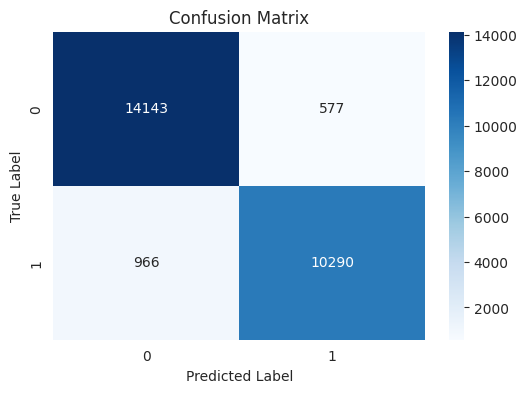

In [ ]:
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

cm = confusion_matrix(y_test, prediction)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

GridSearch CV=  0.89

Halving Grid Search =  0.92

BayesSearchCV= 0.93

Podemos ver que el mejor modelo fue BayesSearchCV de 0.93


# MODELANDO

 Vamos a hacer un problema de clasificacion. Asi que lo que vamos a predecir es si los pasajeros estan satisfecho o indiferentes usando  0 #neutral or dissatisfied 1 #satisfied

# SEGUNDA INTERACCIÓN

In [ ]:
df.loc[df['satisfaction'] < 3, 'satisfaction'] = 0 #neutral or dissatisfied
df.loc[df['satisfaction'] >= 4, 'satisfaction'] = 1 #satisfied

In [ ]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,satisfaction
80638,1,1,26,0,0,861,2,4,2,5,5,2,5,0
43398,0,1,22,1,1,393,3,5,5,5,3,3,3,0
32751,1,1,59,0,0,196,1,3,1,3,2,3,3,0
33571,1,1,32,0,0,1020,2,3,2,4,4,2,4,0
71287,0,2,35,1,1,1117,2,2,2,1,2,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,0,2,39,1,0,637,3,5,3,5,3,3,3,0
76820,0,1,17,0,0,646,3,4,3,1,3,3,2,0
103694,0,1,46,1,0,1197,1,2,2,2,1,1,1,0
860,1,1,37,1,0,320,5,5,5,5,5,5,5,0


## Decision Tree - Clasificación

## HalvingGridSearchCV

In [ ]:
clf_tree = DecisionTreeClassifier()

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5,9],
    'ccp_alpha':[0,0.5,1,10,100]
}

clf_tree_cv = HalvingGridSearchCV(clf_tree, param_grid=param_grid, cv=3, min_resources=30, scoring='accuracy', n_jobs=-1, verbose=2)

clf_tree_cv.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 8
min_resources_: 30
max_resources_: 77928
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 90
n_resources: 30
Fitting 3 folds for each of 90 candidates, totalling 270 fits
----------
iter: 1
n_candidates: 30
n_resources: 90
Fitting 3 folds for each of 30 candidates, totalling 90 fits
----------
iter: 2
n_candidates: 10
n_resources: 270
Fitting 3 folds for each of 10 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 4
n_resources: 810
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 4
n_candidates: 2
n_resources: 2430
Fitting 3 folds for each of 2 candidates, totalling 6 fits


HalvingGridSearchCV(cv=3, estimator=DecisionTreeClassifier(), min_resources=30,
                    n_jobs=-1,
                    param_grid={'ccp_alpha': [0, 0.5, 1, 10, 100],
                                'max_depth': [5, 10, 15],
                                'min_samples_leaf': [5, 9],
                                'min_samples_split': [10, 20, 30]},
                    scoring='accuracy', verbose=2)

##  Calcular la precisión

In [ ]:
y_train_pred = clf_tree_cv.predict(X_train)
y_test_pred = clf_tree_cv.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_test_pred)
print('DecisionTree Model accuracy score: {0:0.3f}'.format(accuracy_tree))

DecisionTree Model accuracy score: 0.902


## Obtener de todas las combinaciones de parámetros los scores

In [ ]:

results = clf_tree_cv.cv_results_
results


df_clf_tree_cv = pd.DataFrame(results)

df_clf_tree_cv["mean_test_score_10%"]=accuracy_tree

df_clf_tree_cv = df_clf_tree_cv[['mean_train_score', 'mean_test_score',  "mean_test_score_10%" ,'params']]
df_clf_tree_cv= df_clf_tree_cv.round(3).sort_values("mean_test_score", ascending=False)[:1]
df_clf_tree_cv["model"]="DecisionTree"

df_clf_tree_cv

,mean_train_score,mean_test_score,mean_test_score_10%,params,model
135,0.908,0.89,0.902,"{'ccp_alpha': 0, 'max_depth': 5, 'min_samples_...",DecisionTree


# Xgboost - Clasificación

In [ ]:
clf_xgb = xgb.XGBClassifier()

In [ ]:
param_grid = {'n_estimators': np.arange(50,80,100),
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5,9],
    'gamma':[i/10.0 for i in range(1,8,2)],
    'alpha':np.arange(0.1,0.8,0.2)
}

clf_xgb_cv = HalvingGridSearchCV(clf_xgb, param_grid=param_grid, cv=5, min_resources=30, scoring='accuracy', n_jobs=-1, verbose=2)

clf_xgb_cv.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 8
min_resources_: 30
max_resources_: 77928
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 288
n_resources: 30
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 1
n_candidates: 96
n_resources: 90
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 2
n_candidates: 32
n_resources: 270
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 3
n_candidates: 11
n_resources: 810
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 4
n_candidates: 4
n_resources: 2430
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 7290
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


HalvingGridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=Non...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...),
                    min_resources=30, n_jobs=-1,
                    param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7]),
                                'gamma': [0.1, 0.3, 0.5, 0.7],
                                'max_depth': [5, 10, 15],
                                'min_samples_leaf': [5, 9],
                                'min_samples_split': [10, 20, 30],
                                'n_estimators': array([50])},
                    scoring='accuracy', verbose=2)

## Prediccion

In [ ]:
y_train_pred = clf_xgb_cv.predict(X_train)
y_test_pred = clf_xgb_cv.predict(X_test)

accuracy_XGBoost = accuracy_score(y_test, y_test_pred)
print('XGBoost Model accuracy score: {0:0.3f}'.format(accuracy_XGBoost ))

XGBoost Model accuracy score: 0.943


## Obtener de todas las combinaciones de parámetros los scores

In [ ]:
results = clf_xgb_cv.cv_results_
results

df_clf_xgb_cv = pd.DataFrame(results)

df_clf_xgb_cv["mean_test_score_10%"]=accuracy_XGBoost

df_clf_xgb_cv = df_clf_xgb_cv[['mean_train_score', 'mean_test_score',  "mean_test_score_10%" ,'params']]
df_clf_xgb_cv= df_clf_xgb_cv.round(3).sort_values("mean_test_score", ascending=False)[:1]
df_clf_xgb_cv["model"]="XGBoost"

df_clf_xgb_cv

,mean_train_score,mean_test_score,mean_test_score_10%,params,model
432,0.983,0.933,0.943,"{'alpha': 0.5000000000000001, 'gamma': 0.3, 'm...",XGBoost


Conclusión:

HalvingGridSearchCV : 0.90

Xgboost: 0.94

LightGBM: 0.92

El mejor resultado fue Xgboost: 0.94

Es un promedio muy cercano a 1, eso quiere decir que los pasajeros están satisfechos


# LightGBM - Clasificación

In [ ]:
clf_LightGBM  = lgb.LGBMClassifier()

##Definicion de Hyperparámetros

In [ ]:


param_grid = {'n_estimators': np.arange(50,70,100),
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5,9],
    'lambda':[i/10.0 for i in range(1,8,2)],
    'alpha':np.arange(0.1,0.8,0.2)
}

clf_LightGBM_cv = HalvingGridSearchCV(clf_LightGBM, param_grid=param_grid, cv=3, min_resources=30, scoring='accuracy', n_jobs=-1, verbose=2)

clf_LightGBM_cv.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 8
min_resources_: 30
max_resources_: 77928
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 288
n_resources: 30
Fitting 3 folds for each of 288 candidates, totalling 864 fits
----------
iter: 1
n_candidates: 96
n_resources: 90
Fitting 3 folds for each of 96 candidates, totalling 288 fits
----------
iter: 2
n_candidates: 32
n_resources: 270
Fitting 3 folds for each of 32 candidates, totalling 96 fits
----------
iter: 3
n_candidates: 11
n_resources: 810
Fitting 3 folds for each of 11 candidates, totalling 33 fits
----------
iter: 4
n_candidates: 4
n_resources: 2430
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 5
n_candidates: 2
n_resources: 7290
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[LightGBM] [Warning] lambda_l2 is set with lambda=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] min_data_in_leaf is set with min_

HalvingGridSearchCV(cv=3, estimator=LGBMClassifier(), min_resources=30,
                    n_jobs=-1,
                    param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7]),
                                'lambda': [0.1, 0.3, 0.5, 0.7],
                                'max_depth': [5, 10, 15],
                                'min_samples_leaf': [5, 9],
                                'min_samples_split': [10, 20, 30],
                                'n_estimators': array([50])},
                    scoring='accuracy', verbose=2)

##Prediccion

In [ ]:
y_train_pred = clf_LightGBM_cv.predict(X_train)
y_test_pred = clf_LightGBM_cv.predict(X_test)


accuracy_LightGBM = accuracy_score(y_test, y_test_pred)
print('LightGBM Model accuracy score: {0:0.3f}'.format(accuracy_LightGBM))

[LightGBM] [Warning] lambda_l2 is set with lambda=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set with lambda=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM Model accuracy score: 0.922


## Obtener de todas las combinaciones de parámetros los scores

In [ ]:
results = clf_LightGBM_cv.cv_results_
results

df_clf_LightGBM_cv = pd.DataFrame(results)

df_clf_LightGBM_cv["mean_test_score_10%"]=accuracy_LightGBM

df_clf_LightGBM_cv = df_clf_LightGBM_cv[['mean_train_score', 'mean_test_score',  "mean_test_score_10%" ,'params']]
df_clf_LightGBM_cv= df_clf_LightGBM_cv.round(3).sort_values("mean_test_score", ascending=False)[:1]
df_clf_LightGBM_cv["model"]="LightGBM"

df_clf_LightGBM_cv

,mean_train_score,mean_test_score,mean_test_score_10%,params,model
401,1.0,0.926,0.922,"{'alpha': 0.5000000000000001, 'lambda': 0.3, '...",LightGBM


# Gradient Boosting - Clasificación

Para la creación del modelo predictivo utiliza la técnica de boosting para minimizar gradualmente los errores de los modelos simples, empleando el método del gradiente a la función de pérdida. Es decir, se pretende minimizar la función de pérdida al agregar los modelos simples.

## Dependencia

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, log_loss, roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier as GBC
gbrt = GBC()
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

In [ ]:
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score

#from matplotlib import pyplot

## Definicion de Hyperparámetros

In [ ]:
param_grid = {'n_estimators': np.arange(50,80,100),
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5,9],
    'ccp_alpha':[0.5,1]
}

GBC_cv = HalvingGridSearchCV(gbrt , param_grid=param_grid, cv=3, min_resources=30, scoring='accuracy', n_jobs=-1, verbose=2)

GBC_cv.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 8
min_resources_: 30
max_resources_: 77928
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 36
n_resources: 30
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 1
n_candidates: 12
n_resources: 90
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 2
n_candidates: 4
n_resources: 270
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 3
n_candidates: 2
n_resources: 810
Fitting 3 folds for each of 2 candidates, totalling 6 fits


HalvingGridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                    min_resources=30, n_jobs=-1,
                    param_grid={'ccp_alpha': [0.5, 1], 'max_depth': [5, 10, 15],
                                'min_samples_leaf': [5, 9],
                                'min_samples_split': [10, 20, 30],
                                'n_estimators': array([50])},
                    scoring='accuracy', verbose=2)

## Prediccion

In [ ]:
y_train_pred = GBC_cv.predict(X_train)
y_test_pred = GBC_cv.predict(X_test)


accuracy_GBC = accuracy_score(y_test, y_test_pred)
print('GBC Model accuracy score: {0:0.3f}'.format(accuracy_GBC))

GBC Model accuracy score: 0.567


## Obtener de todas las combinaciones de parámetros los scores

In [ ]:
results = GBC_cv.cv_results_
results


df_clf_GBC_cv = pd.DataFrame(results)

df_clf_GBC_cv["mean_test_score_10%"]=accuracy_GBC

df_clf_GBC_cv = df_clf_GBC_cv[['mean_train_score', 'mean_test_score',  "mean_test_score_10%" ,'params']]
df_clf_GBC_cv= df_clf_GBC_cv.round(3).sort_values("mean_test_score", ascending=False)[:1]
df_clf_GBC_cv["model"]="GBC"

df_clf_GBC_cv

,mean_train_score,mean_test_score,mean_test_score_10%,params,model
0,0.6,0.667,0.567,"{'ccp_alpha': 0.5, 'max_depth': 5, 'min_sample...",GBC


## Matriz de confusión

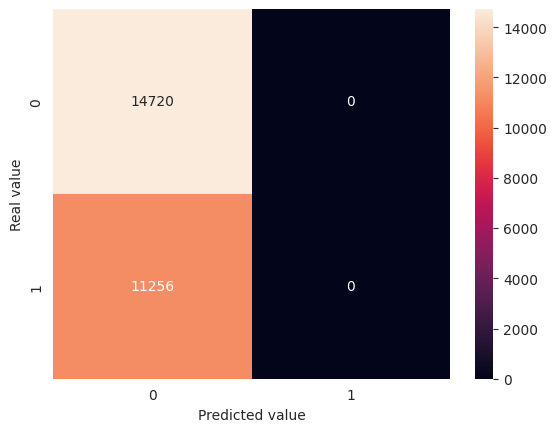

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Real value')
plt.show()

## Análisis de umbrales.

## Resultado general

In [ ]:
df_resultados= pd.concat([df_clf_LightGBM_cv, df_clf_xgb_cv, df_clf_GBC_cv, df_clf_tree_cv], axis=0)
df_resultados

,mean_train_score,mean_test_score,mean_test_score_10%,params,model
401,1.000,0.926,0.922,"{'alpha': 0.5000000000000001, 'lambda': 0.3, '...",LightGBM
432,0.983,0.933,0.943,"{'alpha': 0.5000000000000001, 'gamma': 0.3, 'm...",XGBoost
0,0.600,0.667,0.567,"{'ccp_alpha': 0.5, 'max_depth': 5, 'min_sample...",GBC
135,0.908,0.890,0.902,"{'ccp_alpha': 0, 'max_depth': 5, 'min_samples_...",DecisionTree


# TERCERA INTERACCIÓN

La idea de la última interacción es realizar un nuevo llamo al Dataset que estuvimos utilizando anteriormente y realizar una limpieza, dropeo y estandarización del mismo.  El motivo, poder trabajar limpiamente el archivo sin traer cambios ya efectuados que puedan anteponerse para la validación cruzada. Se intento varias veces realizar la validación cruzada sin volver a cargar nuevamente el DataSet dando así una demora importante para buscar los mejore parámetros.

## VALIDACIÓN CRUZADA  

## Ultima dependencia

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coder house/Coder house Data sience/Proyecto final/train.csv')
df.head(30)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


## EDA

In [ ]:
df = df.drop(labels = ['Unnamed: 0'], axis = 1)

In [ ]:
df.fillna(0,inplace = True)
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df = df.rename(columns={'On-board service': 'Boarding service'})

In [ ]:
df['Customer Type'].replace('Loyal Customer', 'Regular Flyer', inplace=True)
df['Customer Type'].replace('disloyal Customer', 'Irregular Flyer', inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,Boarding service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Regular Flyer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,Irregular Flyer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Regular Flyer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Regular Flyer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Regular Flyer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.isnull().values.any()

False

#FATURE ENGENEERING

## Crear la descripción del DataFrame


In [ ]:
print('Descripción de la Categórica Dataset:')
print("=" * 40)
categorical_description = df.describe(include=['object', 'bool']).T


def style_description(s):
    return f'background-color: blue; font-weight: bold;'

styled_description = categorical_description.style.applymap(style_description)
styled_description

Descripción de la Categórica Dataset:


,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Regular Flyer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [ ]:
#df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1})
#df['satisfaction'].value_counts()


## Balanceo del dataset

In [ ]:
from scipy.stats import f_oneway

# Convert features
column_mapping = {
    'Gender': {'Male': 0, 'Female': 1},
    'Customer Type': {'Irregular Flyer': 0, 'Regular Flyer': 1},
    'Class': {'Business': 0, 'Eco': 1, 'Eco Plus': 2},
    'Type of Travel': {'Personal Travel': 0, 'Business travel': 1},
    'satisfaction': {'neutral or dissatisfied': 0, 'satisfied': 1},
}

df.replace(column_mapping, inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,Boarding service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,0,25,1,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,1,26,1,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,1,25,1,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,1,61,1,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,1,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,0,1,49,1,0,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,0,0,30,1,0,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,1,0,22,1,1,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


### Separación de X & Y

Separar X y Y usando la columna satisfaction

In [ ]:
X = df.drop("satisfaction", axis=1)
y = df['satisfaction']

Divido primero en conjuntos de entrenamiento y temporales

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

Dividir el conjunto temporal en conjuntos de prueba y validación

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Dropeo id para X_train

In [ ]:
X_train = X_train.drop('id', axis=1)

Realizo una copia de id_test y lo guardo en "id"

In [ ]:
id_test = X_test['id'].copy()
id_val = X_val['id'].copy()


Dropeo id para X_test

In [ ]:
X_test = X_test.drop('id', axis=1)

Dropeo id para X_val

In [ ]:
X_val = X_val.drop('id', axis=1)

### Aplicar StandardScaler a las funciones

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

# REGRESIÓN LOGÍCA



Logistic Regression


In [ ]:
logreg = LogisticRegression(C=0.030571559019667797, fit_intercept=True, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

Árbol de decisión


In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=10)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Evaluar el desempeño

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_dtree), accuracy_score(y_test, y_pred_rf)]
precision_scores = [precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_dtree), precision_score(y_test, y_pred_rf)]
recall_scores = [recall_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_dtree), recall_score(y_test, y_pred_rf)]
f1_scores = [f1_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_dtree), f1_score(y_test, y_pred_rf)]
# Creo un DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

### Predicciones

Nota:Para no realizar el codigo en distintas celdas, opte por realizar uno solo para poder asi achicar la cantidad de filas y tener mejor vizualicacion

In [ ]:
# Hacer predicciones sobre el conjunto de validación.
y_pred_val_logreg = logreg.predict(X_val)
y_pred_val_dtree = dtree.predict(X_val)
y_pred_val_rf = rf.predict(X_val)

#valuar el rendimiento en el conjunto de validación
accuracy_val_logreg = accuracy_score(y_val, y_pred_val_logreg)
precision_val_logreg = precision_score(y_val, y_pred_val_logreg)
recall_val_logreg = recall_score(y_val, y_pred_val_logreg)
f1_val_logreg = f1_score(y_val, y_pred_val_logreg)

accuracy_val_dtree = accuracy_score(y_val, y_pred_val_dtree)
precision_val_dtree = precision_score(y_val, y_pred_val_dtree)
recall_val_dtree = recall_score(y_val, y_pred_val_dtree)
f1_val_dtree = f1_score(y_val, y_pred_val_dtree)

accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
precision_val_rf = precision_score(y_val, y_pred_val_rf)
recall_val_rf = recall_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf)

# Crear un DataFrame para los resultados de la validación
validation_results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_val_logreg, accuracy_val_dtree, accuracy_val_rf],
    'Precision': [precision_val_logreg, precision_val_dtree, precision_val_rf],
    'Recall': [recall_val_logreg, recall_val_dtree, recall_val_rf],
    'F1 Score': [f1_val_logreg, f1_val_dtree, f1_val_rf]
})

 # Evaluación del modelo

Nuestra evaluación del modelo abarca métricas clave tanto en el conjunto de prueba como en el de validación:


Test Set: exactitud, precisión, recuperación, puntuación F1: métricas estándar para el rendimiento general.

**Matriz de confusión** (solo mejor modelo) **bold text**: representación visual de la distribución de clases prevista frente a la real.


**Validación Set:** se aplicaron las mismas métricas, lo que garantiza coherencia y confiabilidad en diferentes conjuntos de datos.


**Precisión Recall Curve:** los gráficos para cada modelo en el conjunto de validación brindan información sobre las compensaciones de recuperación de precisión, especialmente en escenarios desequilibrados.


**Importancia de las características para el mejor modelo:** un análisis detallado de la importancia de las características destaca los contribuyentes clave a las predicciones del modelo.


**Validación cruzada de K-Fold:** se emplea para mejorar la confiabilidad entrenando y probando el modelo en diferentes pliegues, minimizando el impacto de la variabilidad del conjunto de datos en las evaluaciones.


Aplicar el estilo al DataFrame Tes Set

In [ ]:
print('Informe de evaluación del modelo: conjunto de set')
print('='*35)
styled_description = results_df.style.applymap(style_description)
styled_description

Informe de evaluación del modelo: conjunto de set


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.877773,0.875806,0.838920,0.856966
1,Decision Tree,0.953515,0.958786,0.933627,0.946040
2,Random Forest,0.962514,0.975783,0.937376,0.956194


El desempeño del modelo en el conjunto de prueba muestra su efectividad para predecir la satisfacción de los pasajeros

Aplicar el estilo al DataFrame

In [ ]:
print('Informe de evaluación del modelo: conjunto de set')
print('='*39)
styled_description = validation_results_df.style.applymap(style_description)
styled_description

Informe de evaluación del modelo: conjunto de set


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.873298,0.871045,0.834413,0.852336
1,Decision Tree,0.955055,0.957564,0.939058,0.948220
2,Random Forest,0.963188,0.973439,0.941693,0.957303


Se observa un desempeño robusto similar en el conjunto de validación, lo que afirma la capacidad de generalización de los modelos:


## Visualización

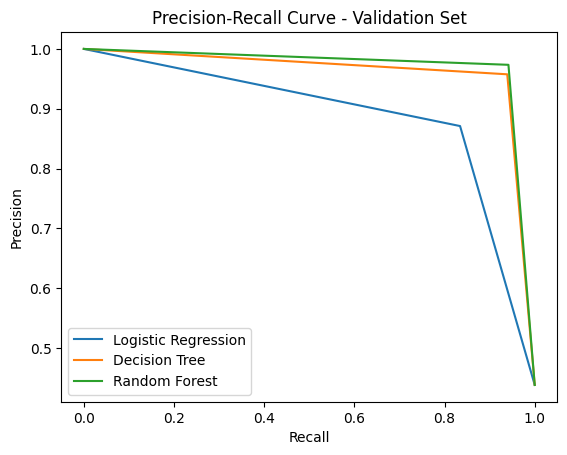

In [ ]:
# Se crea un diccionario para almacenar las predicciones de cada modelo.
y_pred_val_dict = {
    'Logistic Regression': y_pred_val_logreg,
    'Decision Tree': y_pred_val_dtree,
    'Random Forest': y_pred_val_rf
}


for index, row in validation_results_df.iterrows():
    model_name = row['Model']
    precision, recall, _ = precision_recall_curve(y_val, y_pred_val_dict[model_name])


    plt.plot(recall, precision, label=model_name)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend()
plt.show()

## Matriz de confusión

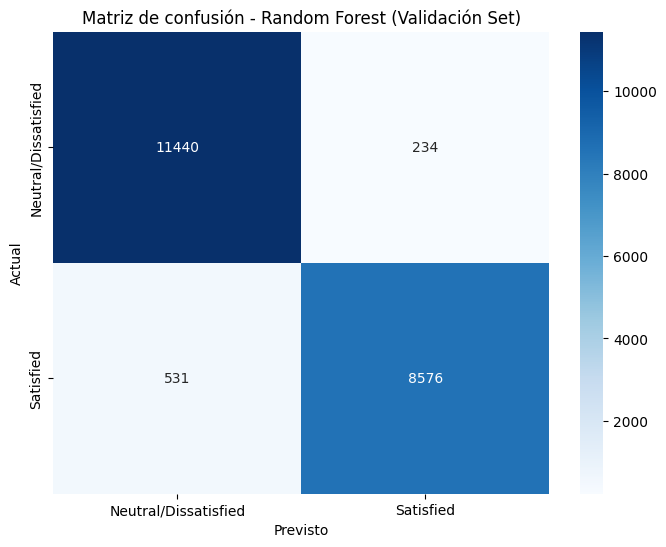

In [ ]:
# Crear una matriz de confusión para Random Forest en el conjunto de validación
conf_matrix_rf_val = confusion_matrix(y_val, y_pred_val_rf)

# Plot matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Matriz de confusión - Random Forest (Validación Set)')
plt.xlabel('Previsto')
plt.ylabel('Actual')
plt.show()

Neutral dissasted: podemos observar que tenemos TN (Verdadero negativo) 11440 contra FP(Falsos positivos) 234

Satisfied: podemos observar que tenemos FN (Falso negativo) 531 contra FT (Falso positivo)8576

La matriz de correlación nos dice que es muy poco el error en la satisfacción tanto en neutra como satisfecho


Obtener características importantes

In [ ]:
feature_importance_val = rf.feature_importances_


In [ ]:
df.columns


Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Boarding service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


Se crea un DataFrame de las columnas (funciones) usando sus scores para la validación y lo visualizo

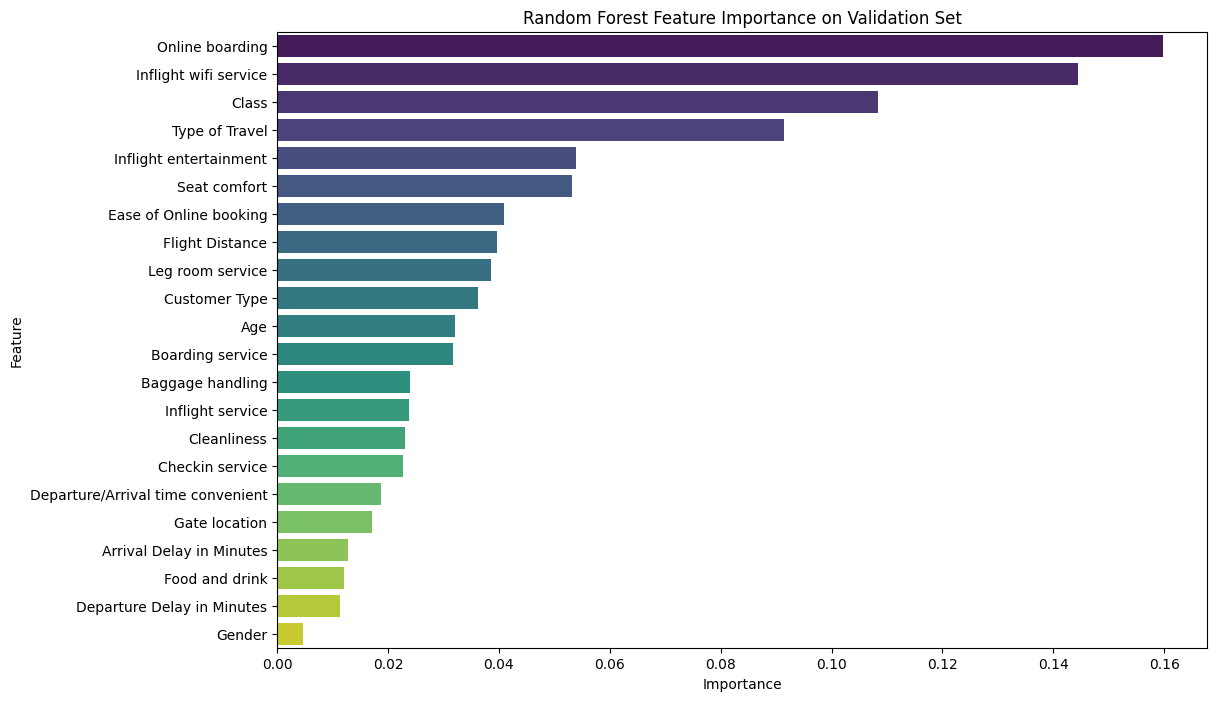

In [ ]:
# Crar DataFrame
feature_importance_val_df = pd.DataFrame({
    'Feature': ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Boarding service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
    'Importance': feature_importance_val
})

feature_importance_val_df = feature_importance_val_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_val_df, palette='viridis')
plt.title('Random Forest Feature Importance on Validation Set')
plt.show()

Aplicar el estilo al DataFrame

In [ ]:
styled_description = feature_importance_val_df.style.applymap(style_description)
styled_description

,Feature,Importance
11,Online boarding,0.159748
6,Inflight wifi service,0.144452
4,Class,0.108357
3,Type of Travel,0.091386
13,Inflight entertainment,0.053899
12,Seat comfort,0.053188
8,Ease of Online booking,0.040845
5,Flight Distance,0.039631
15,Leg room service,0.038554
1,Customer Type,0.036155


Feature Importance (Random Forest)

El modelo Random Forest destaca las siguientes características clave que contribuyen a la satisfacción de los pasajeros:

Online Boarding: 15.97%

Inflight Wifi Service: 14.44%

Class: 10.83%

Type of Travel: 9.1%

 Crear un DataFrame para los resultados de la validación

<Figure size 800x600 with 0 Axes>

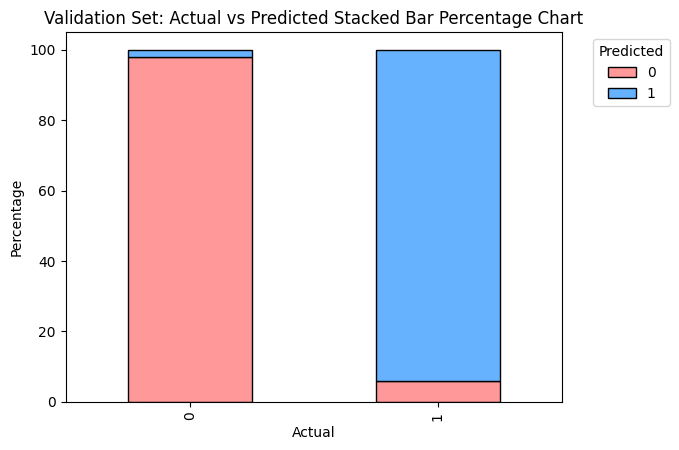

In [ ]:
# Crer a DataFrame
df_results_val = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_val_rf})

# Calcular la distribución porcentual para el conjunto de validación.
percentage_df_val = pd.crosstab(df_results_val['Actual'], df_results_val['Predicted'], normalize='index') * 100

# Crear un gráfico de porcentaje de barras apiladas para el conjunto de validación
plt.figure(figsize=(8, 6))
percentage_df_val.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], edgecolor='black')
plt.title('Validation Set: Actual vs Predicted Stacked Bar Percentage Chart')
plt.xlabel('Actual')
plt.ylabel('Percentage')
plt.legend(title='Predicted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Columna predicción

In [ ]:
df_results_val['Id'] = id_val

print("Predicción")
print("="*39)
df_results_val.head(10)

Predicción


,Actual,Predicted,Id
83826,1,1,19106
71222,0,0,329
61985,1,1,28785
92973,1,1,52342
15283,1,1,47291
89235,0,1,122284
64101,1,1,75046
21115,1,1,27689
101786,1,1,98083
32957,0,0,26033


# Top model: Cross Validation

Realizar validación cruzada

In [ ]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("\n")
print("="*33)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.9562114  0.96022135 0.96102021 0.96134103 0.96166185]


Mean accuracy: 0.9600911704723576


Estos resultados afirman la capacidad de los modelos para predecir con precisión la satisfacción de los pasajeros, destacando Random Forest como particularmente impactante. Los conocimientos sobre la importancia de las características proporcionan información valiosa para comprender los factores que influyen en la satisfacción. La alta precisión de la validación cruzada subraya la confiabilidad de los modelos en diferentes conjuntos de datos.